# Анализ авторынка Казахстана


## Постановка задачи


В этом проекте исследуется датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из официальной статистики VAG. Данные в датасете не подготовлены для анализа: записаны в разных форматах, разными людьми. 


Цель нализа: формирование аналитического отчёта с выявлением наиболее популярных марок и типов автомобилей, ценовых предпочтений покупателей, особенностей рынка, сезонных факторов.


# Открытие файла с данными и изучение общей информации. Исследовательский анализ данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.simplefilter('ignore')

In [2]:
# Открытие и просмотр файла

data = pd.read_csv('kz_2019_final_all_dirt.csv')
pd.set_option('display.max_columns', 100)

data.head()

,Unnamed: 0,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,S-tronic,NaN,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тroic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Астана,Физ. Лицо,наличный,1.0,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,S-troic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,S-troic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс,D,Импорт


In [3]:
# Просмотр информации о данных в таблице

data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32854 entries, 0 to 32853
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      32854 non-null  int64  
 1   Год                             32854 non-null  int64  
 2   Месяц                           32854 non-null  object 
 3   Компания                        32854 non-null  object 
 4   Бренд                           32854 non-null  object 
 5   Модель                          32854 non-null  object 
 6   Модификация                     29729 non-null  object 
 7   Год выпуска                     32700 non-null  object 
 8   Страна-производитель            32854 non-null  object 
 9   Вид топлива                     31942 non-null  object 
 10  Объём двиг, л,                  30968 non-null  object 
 11  Коробка передач                 31662 non-null  object 
 12  Тип привода                     

Удаляю неинформативные столбцы:


* Unnamed: 0 - столбец дублирует значение индекса строки;


* Год - все данные в датасете за 2019 год, в каждой строке датасета одно и то же значение, столбец не несёт дополнительной информации;


* Модификация - не интересует в текущем исследовании;


* Сегмент - столбец частично дублирует информацию из столбца "Сегментация 2013";


* Наименование дилерского центра - не интересует в текущем исследовании;


* Тип клиента - не интересует в текущем исследовании;


* Форма расчета - не интересует в текущем исследовании;


* Область - столбец частично дублирует информацию из столбца "Регион";


* Сегментация Eng - столбец дублирует информацию из столбца "Сегментация 2013";


* Локализация производства - не интересует в текущем исследовании.

In [4]:
# Удаление столбцов, ненужных для текущего исследования

data = data.drop(columns=['Unnamed: 0', 'Год', 'Модификация', 'Сегмент', 'Наименование дилерского центра',
                   'Тип клиента', 'Форма расчета', 'Область', 'Сегментация Eng',
                   'Локализация производства'])

In [5]:
# Переименование столбцов

data = data.rename(columns={'Месяц' : 'month',
                           'Компания':'company',
                           'Бренд':'brand',
                           'Модель':'model',
                           'Год выпуска':'release',
                           'Страна-производитель':'made_in',
                           'Вид топлива':'fuel',
                           'Объём двиг, л,':'capacity_engine',
                           'Коробка передач':'transmission',
                           'Тип привода':'type_drive',
                           'Регион':'region',
                           'Количество':'quantity',
                           'Цена, USD':'price',
                           'Продажа, USD':'sale',
                           'Сегментация 2013':'segment',
                           'Класс 2013':'class_2013'})

In [6]:
# Проверка выполнения операций

data.head(2)

,month,company,brand,model,release,made_in,fuel,capacity_engine,transmission,type_drive,region,quantity,price,sale,segment,class_2013
0,Март,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,1.0,31250.0,31250.0,Легковые автомобили,C класс
1,Май,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тronic,FWD,Алматы,1.0,30581.0,30581.0,Легковые автомобили,C класс


Последовательно проверяю содержимое каждого столбца. При необходимости привожу записи к единому формату, меняю тип данных и т.д. Также смотрю как часто встречается та или иная запись.

### Обработка данных столбца month (Месяц)

In [7]:
# Вывод уникальных значений столбца "Месяц"

data['month'].unique()

array(['Март', 'Май', 'Июнь', 'Июль', 'Январь', 'Февраль', 'Апрель',
       'Август', 'Сентябрь'], dtype=object)

In [8]:
# Замена обозначений месяцов на соответствующие численные обозначения

data['month'] = data['month'].replace(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
                                'Июль', 'Август', 'Сентябрь'], ['01.2019', '02.2019', '03.2019',
                                '04.2019', '05.2019', '06.2019', '07.2019', '08.2019', '09.2019'])

In [9]:
# # Перевод значений в численный формат

# data['Месяц'] = data['Месяц'].apply(pd.to_numeric)

# data['Количество'] = data['Количество'].apply(pd.to_numeric)

In [10]:
# Просмотр количества сделок по месяцам

data['month'].value_counts()

08.2019    4199
06.2019    4172
09.2019    4148
05.2019    4113
07.2019    3836
04.2019    3402
02.2019    3245
03.2019    3232
01.2019    2507
Name: month, dtype: int64

In [11]:
# Просмотр количества сделок по месяцам

data_months =  data.groupby('month', as_index=False)['quantity'].sum().sort_values(by='month')
data_months

,month,quantity
0,01.2019,3294.0
1,02.2019,4269.0
2,03.2019,4300.0
3,04.2019,4603.0
4,05.2019,5316.0
5,06.2019,5604.0
6,07.2019,5272.0
7,08.2019,5570.0
8,09.2019,5729.0


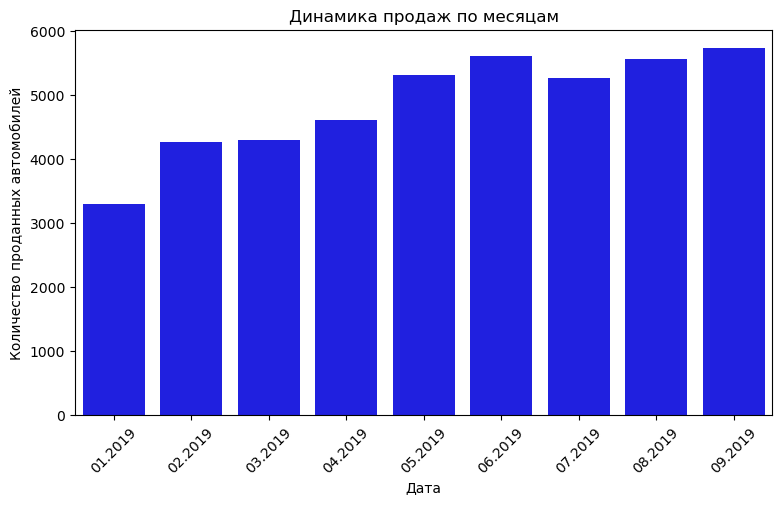

In [12]:
# Построение графика

plt.figure(figsize=(9, 5))
sns.barplot(data=data_months, x='month', y='quantity', color = 'blue')
plt.xlabel('Дата')
plt.ylabel('Количество проданных автомобилей')
plt.title('Динамика продаж по месяцам')
plt.xticks(rotation = 45)
plt.show()

### Обработка данных столбца company  (Компания)

In [13]:
# Вывод уникальных значений столбца "Компания"

data['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Sivi Finance Consulting', 'Eurasia Motor Premium',
       'Daewoo Bus Kazakhstan', 'Caspian Motors', 'Каспиан Моторс',
       'СемАЗ', 'ТК Рос-Авто', 'Astana Motors',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS', 'СВС',
       'СВС-ТРАНС', 'Allur Auto', 'Jaguar Land Rover', 'ТК КАМАЗ',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'MMC RUS', 'ММС Рус', 'УзАвто-Казахстан', 'Алматы АТО',
       'Renault Россия', 'Scania Central Asia', 'Subaru Kazakhstan',
       'SMC', 'Scandinavian Motors', 'Хино Моторс Казахстан',
       'Hino Motors Kazakhstan'], dtype=object)

Судя по результата запросов в интернет, "СВС" и "СВС-ТРАНС" - это одна и та же компания. Объединяю их в одну под названием "СВС".

In [14]:
# Переименование и объединение наименований компаний

data = data.replace('Каспиан Моторс', 'Caspian Motors')
data = data.replace('ММС Рус', 'MMC RUS')
data = data.replace('Хино Моторс Казахстан', 'Hino Motors Kazakhstan')
data = data.replace('СВС-ТРАНС', 'СВС')

# Просмотр частоты продаж у различных компаний

data['company'].value_counts()

Toyota Motor Kazakhstan          10442
Astana Motors                     5746
БИПЭК АВТО                        3595
Вираж                             3358
УзАвто-Казахстан                  1727
Allur Auto                        1359
Renault Россия                    1088
Nissan Manufacturing RUS          1037
Mercur Auto                        940
ТК КАМАЗ                           888
Лифан Моторс Рус                   566
Subaru Kazakhstan                  520
MMC RUS                            312
СВС                                203
Автоцентр-Бавария                  198
Caspian Motors                     183
Jaguar Land Rover                  164
Autokapital                        156
Автомир ГК                         111
СемАЗ                               70
Hino Motors Kazakhstan              33
Алматы АТО                          30
Hyundai Com Trans Kazakhstan        28
Eurasia Motor Premium               24
Scandinavian Motors                 22
Scania Central Asia      

In [15]:
# Подсчёт уникальных значений столбца "Компания"

data['company'].nunique()

31

### Обработка данных столбца brand (Бренд)

In [16]:
# Вывод уникальных значений столбца "Бренд"

data['brand'].unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Shacman', 'Skoda', 'SsangYong', 'Subaru',
       'Suzuki', 'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'Урал', 'МАЗ',
       'Cadillac', 'ANKAI', 'Hino', 'Rolls Royce'], dtype=object)

В столбце содержаться записи:

'Hyundai' и 'Hyundai Truck & Bus'

'Mercedes-Benz' и 'Mercedes-Benz Trucks'

Решаю оставить записи в текущем виде, т.к. слова Truck и Bus несут дополнительную информацию, не искажая смысла основной записи - бренда автомобиля.

In [17]:
# Просмотр популярности брендов автомобилей по количеству сделок

data['brand'].value_counts()

Toyota                  9374
Hyundai                 5703
Lada                    2116
GAZ                     2111
Ravon                   1727
Renault                 1332
Lexus                   1068
Jac                     1027
UAZ                      954
Nissan                   948
KAMAZ                    888
Volkswagen               777
Chevrolet                675
Kia                      654
Lifan                    566
Subaru                   520
Mitsubishi               312
Skoda                    252
Isuzu                    199
BMW                      185
Ford                     183
Land Rover               149
Peugeot                  132
Mercedes-Benz            115
Mazda                    111
Iveco                    109
Audi                     103
Infiniti                  89
ANKAI                     75
Hyundai Truck & Bus       67
Porsche                   60
Mercedes-Benz Trucks      41
Shacman                   36
Hino                      33
Volvo         

In [18]:
# Просмотр популярности брендов автомобилей по количеству проданных автомобилей

data_brands = data.groupby('brand', as_index=False)['quantity'].sum().sort_values(by='quantity',
                                                                                  ascending = False)
data_brands

,brand,quantity
19,Lada,9667.0
41,Toyota,9374.0
10,Hyundai,5703.0
8,GAZ,2111.0
18,Kia,1815.0
32,Ravon,1727.0
29,Nissan,1662.0
33,Renault,1339.0
42,UAZ,1085.0
21,Lexus,1068.0


In [19]:
# Подсчёт уникальных значений столбца "Бренд"

data['brand'].nunique()

47

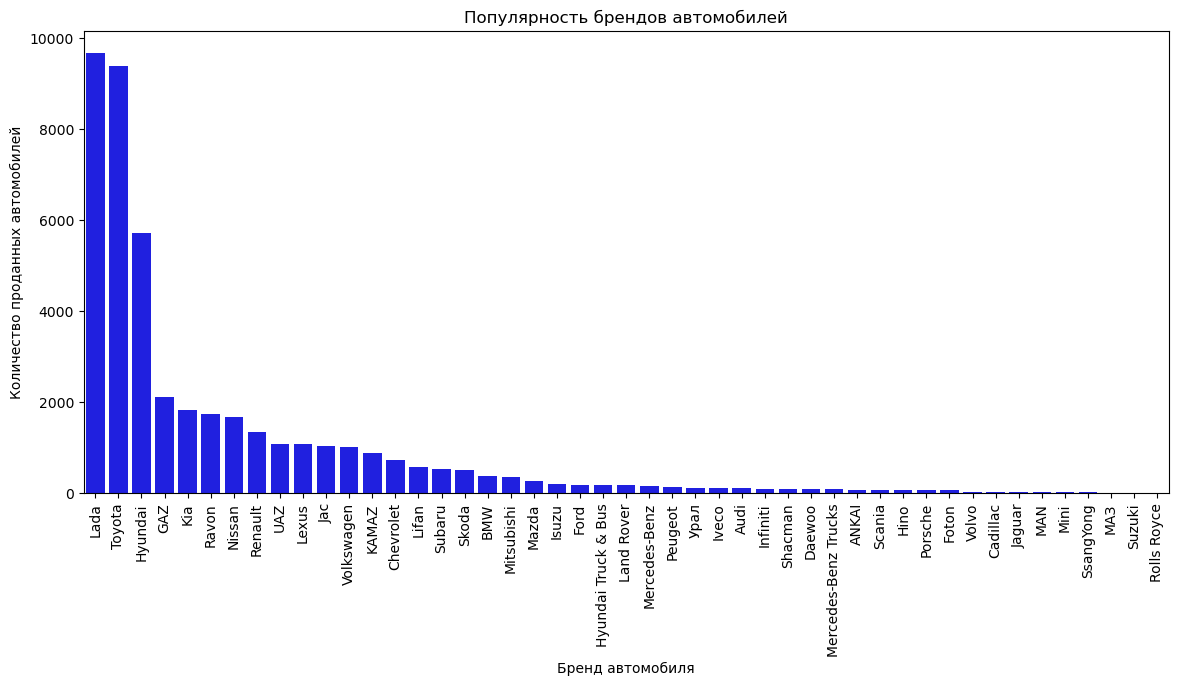

In [20]:
# Построение графика

plt.figure(figsize=(14, 6))
sns.barplot(data=data_brands, x='brand', y='quantity', color = 'blue')
plt.xlabel('Бренд автомобиля')
plt.ylabel('Количество проданных автомобилей')
plt.title('Популярность брендов автомобилей')
plt.xticks(rotation = 90)
plt.show()

### Обработка данных столбца model (Модель)

In [21]:
# Вывод уникальных значений столбца "Модель"

data['model'].unique()

array(['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Q5', 'Q7', '1 серия',
       '2 серия', '3 серия', '4 серия', '5 серия', '6 серия', '7 серия',
       'i3', 'X1', 'X3', 'X4', 'X5', 'X6', 'Aveo', 'Captiva', 'Niva',
       'Tahoe', 'Tracker', 'BS 106 A', 'EcoSport', 'Explorer', 'Fiesta',
       'Focus', 'Kuga', 'Mondeo', 'Transit', 'Transit Custom',
       'BJ1032V3JB3-S', 'BJ3143DKPGA-1', 'BJ3253DMPKB-AD',
       'BJ5032V3BB3-S', 'BJ5163VKCHN-1', '2217', '2310', '2705', '2752',
       '3221', '3302', '3308', '3309', 'Next', 'Accent', 'Creta',
       'Elantra', 'Genesis G90', 'Grandeur', 'Santa Fe', 'Sonata',
       'TQ-1/H-1', 'County', 'H350', 'HD 160', 'HD 170', 'HD 260',
       'HD 65', 'HD 72', 'HD 78', 'Universe', 'Tucson', 'Q30', 'Q50',
       'QX30', 'QX50', 'QX60', 'QX70', 'QX80', 'D-MAX', 'FVR34', 'NMR',
       'NPR', 'NQR71', 'Daily', 'Daily A', 'Daily V', 'Stralis', 'Tipper',
       'S3', 'S5', 'F-Pace', 'XE', 'XF', '4308', '43114', '43118',
       '43253', '43502', '44108', '4514

In [22]:
# Подсчёт уникальных значений столбца "Модель"

data['model'].nunique()

294

In [23]:
# Выборочная проверка подозрительных наименований моделей

# data.loc[data.loc[:,'model'] == '1 серия'] 
# data.loc[data.loc[:,'model'] == 'BJ1032V3JB3-S'] 
# data.loc[data.loc[:,'model'] == 'Niva'] 
# data.loc[data.loc[:,'model'] == '4x4'] 
# data.loc[data.loc[:,'model'] == '4x4 Pickup'] 
# data.loc[data.loc[:,'model'] == 'A-Class'] 
# data.loc[data.loc[:,'model'] == 'GLS-Class'] 
# data.loc[data.loc[:,'model'] == '3'] 
# data.loc[data.loc[:,'model'] == 'SX5256GJBDR384'] 
# data.loc[data.loc[:,'model'] == 'Transporter'] 
# data.loc[data.loc[:,'model'] == 'Transporter Kasten'] 
data.loc[data.loc[:,'model'] == 'HFF6111K10EV21'] 


,month,company,brand,model,release,made_in,fuel,capacity_engine,transmission,type_drive,region,quantity,price,sale,segment,class_2013
32835,08.2019,Allur Auto,ANKAI,HFF6111K10EV21,2018,Республика Казахстан,Электрический,NaN,AT,2WD,Актау,1.0,169511.096574,169511.096574,Коммерческие автомобили,Большие автобусы
32836,08.2019,Allur Auto,ANKAI,HFF6111K10EV21,2018,Республика Казахстан,Электрический,NaN,AT,2WD,Актау,1.0,169511.096574,169511.096574,Коммерческие автомобили,Большие автобусы
32837,08.2019,Allur Auto,ANKAI,HFF6111K10EV21,2018,Республика Казахстан,Электрический,NaN,AT,2WD,Актау,1.0,169511.096574,169511.096574,Коммерческие автомобили,Большие автобусы
32838,08.2019,Allur Auto,ANKAI,HFF6111K10EV21,2018,Республика Казахстан,Электрический,NaN,AT,2WD,Актау,1.0,169511.096574,169511.096574,Коммерческие автомобили,Большие автобусы
32839,08.2019,Allur Auto,ANKAI,HFF6111K10EV21,2018,Республика Казахстан,Электрический,NaN,AT,2WD,Актау,1.0,169511.096574,169511.096574,Коммерческие автомобили,Большие автобусы


In [24]:
# Просмотр популярности моделей автомобилей по количеству проданных автомобилей

data_model = data.groupby('model',
                    as_index=False)['quantity'].sum().sort_values(by = 'quantity',
                                                    ascending = False).head(10).reset_index()

data_model

,index,model,quantity
0,90,Camry,3440.0
1,136,Granta,2771.0
2,34,4x4,2329.0
3,261,Tucson,1890.0
4,265,Vesta,1843.0
5,163,Largus,1616.0
6,159,LC Prado,1489.0
7,218,RAV4,1348.0
8,72,Accent,1332.0
9,101,Creta,1202.0


### Обработка данных столбца release (Год выпуска)

In [25]:
# Вывод уникальных значений столбца "Год выпуска"

data['release'].unique()

array(['2017', '2018', '2016', '2011', '2015', nan, '2014', '2013',
       '2012', '2\xa0018', '2\xa0017', '2\xa0016', 2018, 2017, 2015, 2016],
      dtype=object)

In [26]:
# Перевод типа данных для последующих преобразований

data['release'] = data['release'].astype(str)

In [27]:
# Переименование обозначений года выпуска автомобилей

data['release'] = data['release'].replace('\xa0', '', regex=True)

# Вывод уникальных значений столбца "Год выпуска" после замены записей

data['release'].unique()

array(['2017', '2018', '2016', '2011', '2015', 'nan', '2014', '2013',
       '2012'], dtype=object)

In [28]:
# Просмотр годов выпуска автомобилей по количеству проданных автомобилей

data_release = data.groupby('release',
                        as_index=False)['quantity'].sum().sort_values(by = 'quantity',
                                                                ascending = False).reset_index()

data_release

,index,release,quantity
0,7,2018,32811.0
1,6,2017,10478.0
2,8,nan,360.0
3,5,2016,246.0
4,4,2015,49.0
5,3,2014,6.0
6,2,2013,3.0
7,0,2011,2.0
8,1,2012,2.0


In [29]:
print('Пропусков в столбце с годом выпуска автомобиля:', data['release'].isna().sum()) 

Пропусков в столбце с годом выпуска автомобиля: 0


### Обработка данных столбца made_in (Страна-производитель)

In [30]:
# Вывод уникальных значений столбца "Страна-производитель"

data['made_in'].unique()

array(['Германия', 'США', 'Республика Казахстан', 'Российская Федерация',
       'Белоруссия', 'Турция', 'Япония', 'Корея', 'Вьетнам', 'UK',
       'Таиланд', 'Узбекистан', 'Венгрия', 'Австрия', 'Нидерланды',
       'Швеция'], dtype=object)

In [31]:
# Замена обозначений страны выпуска укороченной буквенной кодировкой

data['made_in'] = data['made_in'].str.replace('Германия', 'GE')\
                                .str.replace('США', 'US')\
                                .str.replace('Республика Казахстан', 'KZ')\
                                .str.replace('Российская Федерация', 'RU')\
                                .str.replace('Белоруссия', 'BY')\
                                .str.replace('Турция', 'TR')\
                                .str.replace('Япония', 'JP')\
                                .str.replace('Корея', 'KR')\
                                .str.replace('Вьетнам', 'VN')\
                                .str.replace('Таиланд', 'TH')\
                                .str.replace('Узбекистан', 'UZ')\
                                .str.replace('Венгрия', 'HU')\
                                .str.replace('Австрия', 'AT')\
                                .str.replace('Нидерланды', 'NL')\
                                .str.replace('Швеция', 'SE')

# Вывод уникальных значений столбца "Страна-производитель" после замены обозначений

data['made_in'].unique()

array(['GE', 'US', 'KZ', 'RU', 'BY', 'TR', 'JP', 'KR', 'VN', 'UK', 'TH',
       'UZ', 'HU', 'AT', 'NL', 'SE'], dtype=object)

In [32]:
# Просмотр стран-производителей автомобилей по количеству проданных автомобилей

data_countries = data.groupby('made_in',
                as_index = False)['quantity'].sum().sort_values(by='quantity',
                                                            ascending = False).reset_index()

data_countries

,index,made_in,quantity
0,6,KZ,20708.0
1,8,RU,13675.0
2,4,JP,5024.0
3,11,TR,1214.0
4,14,UZ,1178.0
5,10,TH,953.0
6,2,GE,437.0
7,13,US,374.0
8,12,UK,259.0
9,7,NL,72.0


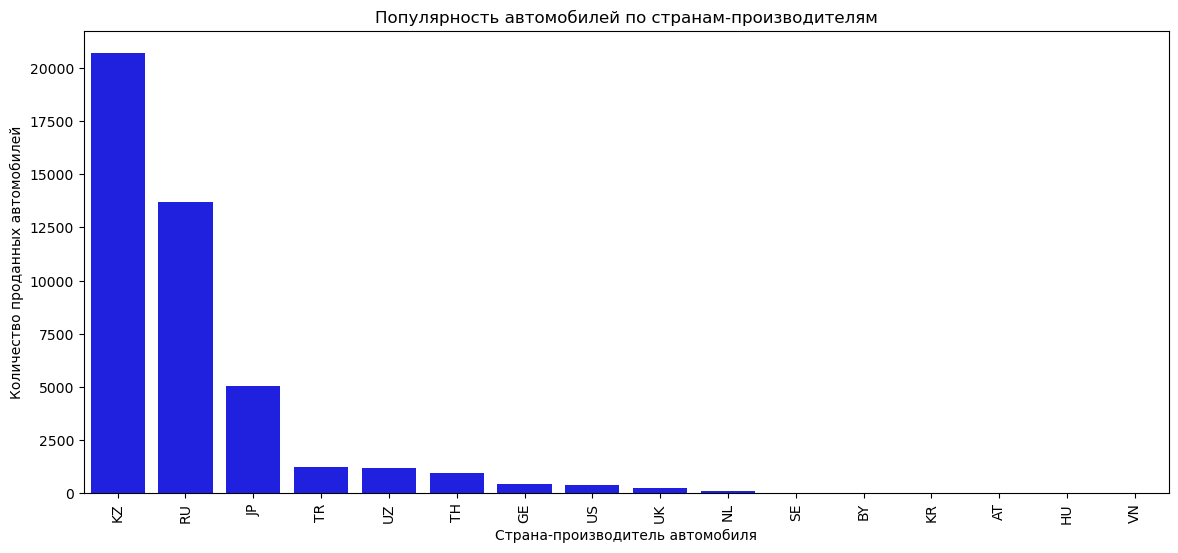

In [33]:
# Построение графика

plt.figure(figsize=(14, 6))
sns.barplot(data=data_countries, x='made_in', y='quantity', color = 'blue')
plt.xlabel('Страна-производитель автомобиля')
plt.ylabel('Количество проданных автомобилей')
plt.title('Популярность автомобилей по странам-производителям')
plt.xticks(rotation = 90)
plt.show()

### Обработка данных столбца fuel (Вид топлива)

In [34]:
# Вывод уникальных значений столбца "Вид топлива"

data['fuel'].unique()

array(['Бензин', 'Дизель', 'гибрид', 'Электрический', nan, '0', 'дизель ',
       'Газовый'], dtype=object)

In [35]:
# Унификация записей

data['fuel'] = data['fuel'].str.capitalize()

In [36]:
# Перевод всех значений "0" в значение NaN

cols = ['fuel', 'capacity_engine', 'transmission', 'type_drive', 'price']

data[cols] = data[cols].replace(['0', 0], np.nan)

In [37]:
print('Пропусков в столбце с видом топлива до обработки:', data['fuel'].isna().sum())

Пропусков в столбце с видом топлива до обработки: 916


В столбце много пропусков. Необходимо восплнить пропуски.

Вид топлива можно определить, в том числе, по бренду автомобиля. Так, большинство тяжёлых грузовиков имеют двигатели на дизельном топливе, а большая часть городских легковых автомобилей оснащены бензиновыми двигателями.

Для уверенности вывожу бренды автомобилей с гибридными, электрическими двигателями и двигателями, работающими на газе.

In [38]:
# Вывод брендов автомобилей с гибридным двигателем

hybrid = data.loc[data.loc[:,'fuel'] == 'гибрид']

hybrid['brand'].unique()

array([], dtype=object)

In [39]:
# Вывод брендов автомобилей с электрическим двигателем

electric = data.loc[data.loc[:,'fuel'] == 'Электрический']

electric['brand'].unique()

array(['BMW', 'Jac', 'ANKAI'], dtype=object)

In [40]:
# Вывод брендов автомобилей с газовым двигателем

gas = data.loc[data.loc[:,'fuel'] == 'Газовый']

gas['brand'].unique()

array(['ANKAI'], dtype=object)

In [41]:
# Создание копии таблицы

data_1 = data.copy()

In [42]:
# Замена в копии таблицы всех пропущенных значений вида топлива нулями

data_1['fuel'] = data_1['fuel'].fillna('0')

In [43]:
# Выделение в отдельную таблицу строк с отстутвующим значением вида топлива

data_1 = data_1.loc[data_1.loc[:,'fuel'] == '0']

In [44]:
# Вывод брендов, у которых отсутствует вид топлива

data_1['brand'].unique()

array(['Foton', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Jaguar',
       'Lada', 'Land Rover', 'Lexus', 'Mazda', 'Renault', 'Shacman',
       'UAZ', 'Volkswagen', 'Урал'], dtype=object)

In [45]:
# Бренды автомобилей всегда или чаще всего оснащённые дизельными двигателями

dizel_brand = ['Shacman', 'Урал', 'Isuzu', 'Foton', 'Hyundai Truck & Bus']

In [46]:
# Бренды автомобилей всегда или чаще всего оснащённые бензиновыми двигателями

benz_brand = ['Jaguar', 'Lada', 'Land Rover', 'Mazda', 'Renault', 'UAZ']

In [47]:
# Функция для унификации записей в столбце "Вид топлива" в зависимости от бренда автомобиля

def brand_fuel(row):
    if row in dizel_brand:
        result = 'Дизель'
    elif row in benz_brand:
        result = 'Бензин'
    else:
        result = np.nan
    return result

In [48]:
# Восполнение записей в столбце "Вид топлива"
 
data['fuel_new_1'] = data['brand'].apply(brand_fuel)

In [49]:
# Объединение вновь сформированных столбцов, объединение данных в них

data['fuel_new'] = data['fuel'].fillna(data['fuel_new_1'])

In [50]:
data.head(2)

,month,company,brand,model,release,made_in,fuel,capacity_engine,transmission,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new_1,fuel_new
0,03.2019,Mercur Auto,Audi,A3,2017,GE,Бензин,1.4,S-tronic,NaN,Алматы,1.0,31250.0,31250.0,Легковые автомобили,C класс,NaN,Бензин
1,05.2019,Mercur Auto,Audi,A3,2018,GE,Бензин,1.4,S-Тronic,FWD,Алматы,1.0,30581.0,30581.0,Легковые автомобили,C класс,NaN,Бензин


In [51]:
# Удаление неактуальных столбцов

data = data.drop(columns=['fuel', 'fuel_new_1'])

In [52]:
# Проверка после преобразований

data['fuel_new'].unique()

array(['Бензин', 'Дизель', 'Гибрид', 'Электрический', nan, 'Дизель ',
       'Газовый'], dtype=object)

In [53]:
# Просмотр количеств проданных автомобилей с разным видом топлива

data_fuel = data.groupby('fuel_new',
                         as_index = False)['quantity'].sum().sort_values(by = 'quantity',
                                                            ascending = False).reset_index()

data_fuel

,index,fuel_new,quantity
0,0,Бензин,41428.0
1,3,Дизель,2316.0
2,1,Газовый,70.0
3,5,Электрический,31.0
4,2,Гибрид,24.0
5,4,Дизель,1.0


In [54]:
print('Пропусков в столбце с видом топлива после обработки:', data['fuel_new'].isna().sum())

Пропусков в столбце с видом топлива после обработки: 87


### Обработка данных столбца capacity_engine (Объём двигателя в литрах)

In [55]:

print('Пропусков в столбце с объёмом двигателя до обработки:',
      data['capacity_engine'].isna().sum())

Пропусков в столбце с объёмом двигателя до обработки: 1947


In [56]:
# Вывод уникальных значений столбца "Объём двигателя, л."

data['capacity_engine'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '1.8', '1.596', '1596',
       '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.9', '4.6', '3,5', '5.7', '10.5', '6.7', '2/2,5',
       '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3',
       '0.002', '0.0016', '1998', '13', '16', '1400', '2.3', '1.33',
       '2,4G', '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8',
       '17.5', '1,2T', '4.88', 4.88, 4.0, 2.0, 6.6, 7.8, 2.8, 3.6],
      dtype=object)

In [57]:
# Последовательный вывод подозрительных значений

# data.loc[data.loc[:,'capacity_engine'] == '2/2,5']
# data.loc[data.loc[:,'capacity_engine'] == '12']
# data.loc[data.loc[:,'capacity_engine'] == '13']
# data.loc[data.loc[:,'capacity_engine'] == '16']
# data.loc[data.loc[:,'capacity_engine'] == '1,2T']
# data.loc[data.loc[:,'capacity_engine'] == '0.002']
data.loc[data.loc[:,'capacity_engine'] == '0.0016']


,month,company,brand,model,release,made_in,capacity_engine,transmission,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new
19204,06.2019,Renault Россия,Renault,Duster,2018,RU,0.0016,AT,FWD,Уральск,1.0,12901.690074,12901.690074,Внедорожники,Компактные SUV,Бензин
19222,06.2019,Renault Россия,Renault,Duster,2018,RU,0.0016,MT,4WD,Караганда,1.0,12901.690074,12901.690074,Внедорожники,Компактные SUV,Бензин
19227,06.2019,Renault Россия,Renault,Duster,2018,RU,0.0016,MT,4WD,Караганда,1.0,12901.690074,12901.690074,Внедорожники,Компактные SUV,Бензин
19228,06.2019,Renault Россия,Renault,Duster,2018,RU,0.0016,AT,FWD,Астана,1.0,12901.690074,12901.690074,Внедорожники,Компактные SUV,Бензин
19235,06.2019,Renault Россия,Renault,Duster,2018,RU,0.0016,MT,4WD,Усть-Каменогорск,1.0,12901.690074,12901.690074,Внедорожники,Компактные SUV,Бензин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,06.2019,Renault Россия,Renault,Sandero,2018,RU,0.0016,NaN,NaN,Алматы,1.0,13208.164723,13208.164723,Легковые автомобили,B класс,Бензин
20063,06.2019,Renault Россия,Renault,Sandero,2018,RU,0.0016,NaN,NaN,Петропавловск,1.0,13208.164723,13208.164723,Легковые автомобили,B класс,Бензин
20064,06.2019,Renault Россия,Renault,Sandero,2018,RU,0.0016,NaN,NaN,Астана,1.0,13208.164723,13208.164723,Легковые автомобили,B класс,Бензин
20066,06.2019,Renault Россия,Renault,Sandero,2018,RU,0.0016,MT,FWD,Астана,1.0,13208.164723,13208.164723,Легковые автомобили,B класс,Бензин


Обозначения объёма двигателя нужно привести к единой форме записи, избавиться от буквенных обозначений. В текущем анализе достаточная точность данных об объёме двигателя автомобиля - одна десятая литра. Данные в таблице привожу к единой форме записи.

In [58]:
# Функция, отсекающая буквенные обозначения

def symbols(row):
    new_row = ''
    right_symbols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '.', ',']
    for symbol in str(row):
        if symbol in right_symbols:
            new_row += symbol
    return new_row
    

In [59]:
# Применение функции по отсечению буквенных обозначений

data['capacity_engine'] = data['capacity_engine'].apply(symbols)

In [60]:
# Замена запятых точками

data['capacity_engine'] = data['capacity_engine'].str.replace(',', '.')

In [61]:
# Функция, приводящая значения объёма к литрам, пересчёт с кубических метров 
# и кубических сантиметров
# Значение 22.5 появляется на предыдущих шагах при переопределении значения 2/2.5

def thousands(row):
    if row == '':
        return np.nan
    elif float(row) > 100:
        return float(row)/1000
    elif float(row) < 1:
        return float(row) * 1000
    elif float(row) == 22.5:
        return 2.0
    else:
        return row
    

In [62]:
# Пересчёт значений

data['capacity_engine'] = data['capacity_engine'].apply(thousands)

In [63]:
# Перевод в численный формат и округление

data['capacity_engine'] = round(pd.to_numeric(data['capacity_engine']), 1)

In [64]:
# Проверка выполнения преобразований

data['capacity_engine'].unique()

array([ 1.4,  2. ,  3. ,  1.5,  4.4,  6.6,  nan,  1.8,  1.6,  2.4,  1.7,
        6.2,  2.5,  3.5,  2.2,  2.7,  2.8,  4.2,  5. ,  3.9,  7.5, 11. ,
       12.3,  3.7,  5.6,  7.8,  2.9,  5.2, 10.3,  8.7,  1.2,  3.8,  3.3,
        4.9,  4.6,  5.7, 10.5,  6.7,  4. ,  5.5, 12. ,  3.6,  6.5,  4.5,
        1.3, 13. , 16. ,  2.3, 14.9, 14.8, 17.5])

После унификации записей фактическое количество пропусков осталось прежним. Далее восстанавливаю пропуски.

In [65]:
# Создание копии таблицы

data_2 = data.copy()

In [66]:
# Замена в копии таблицы всех пропущенных значений объёма двигателя нулями

data_2['capacity_engine'] = data_2['capacity_engine'].fillna('0')

In [67]:
# Выделение в отдельную таблицу строк с отстутвующим значением объёма двигателя

data_2 = data_2.loc[data_2.loc[:,'capacity_engine'] == '0']

In [68]:
# Вывод моделей, у которых отсутствут данные об объёме двигателя

data_2['model'].unique()

array(['i3', 'BJ1032V3JB3-S', 'BJ3143DKPGA-1', 'BJ3253DMPKB-AD',
       'BJ5032V3BB3-S', 'BJ5163VKCHN-1', 'Universe', 'Q30', 'Q50', 'QX50',
       'D-MAX', 'FVR34', 'NMR', 'NPR', 'NQR71', 'S3', 'F-Pace', 'XE',
       'XF', '4308', '43114', '43118', '43253', '43502', '44108', '45142',
       '45143', '53215', '5350', '53504', '53605', '5490', '5814', '6460',
       '65111', '65115', '65116', '65117', '6520', '65206', '65225',
       '65806', '66052', '66062', '66065', 'КО 829Б ', 'КО-505А',
       'Discovery', 'Discovery Sport', 'Range Rover',
       'Range Rover Evoque', 'Range Rover Sport', 'ES', 'TG', '3', '6',
       'CX-5', '301', 'Duster', 'Kaptur', 'Koleos', 'Logan', 'Sandero',
       'SX3256DR384', 'SX5256GJBDR384', 'Amarok', 'Caravelle', 'Jetta',
       'Passat B8', 'Polo', 'Tiguan', 'Touareg', '4320', '4320-1951-60',
       '43206-0551', '5557', 'Q60', 'CX-9', 'Range Rover Velar', 'E-PACE',
       'Dokker', 'R 61', 'SX3258DR384', 'iev', 'NQR', 'ЕА-17У', '65224',
       'HFF611

In [69]:
# Просмотр полноты информации для автомобилей бренда КАМАЗ

data.loc[data.loc[:,'brand'] == 'KAMAZ'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 10401 to 32850
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            888 non-null    object 
 1   company          888 non-null    object 
 2   brand            888 non-null    object 
 3   model            888 non-null    object 
 4   release          888 non-null    object 
 5   made_in          888 non-null    object 
 6   capacity_engine  0 non-null      float64
 7   transmission     888 non-null    object 
 8   type_drive       0 non-null      object 
 9   region           888 non-null    object 
 10  quantity         888 non-null    float64
 11  price            888 non-null    float64
 12  sale             888 non-null    float64
 13  segment          888 non-null    object 
 14  class_2013       888 non-null    object 
 15  fuel_new         888 non-null    object 
dtypes: float64(4), object(12)
memory usage: 117.9+ KB


Вывод списка моделей автомобилей, для которых отсутствует запись об объёме двигателя показывает, что чаще всего нет записей для грузовиков. При этом, например, бренд КАМАЗ - 11-ая строчка по популярности, но ни для одной модели КАМАЗа не указан объём двигателя. Грузовики - главная составляющая сектора коммерческих автомобилей. Без анализа сектора коммерческих автомобилей анализ рынка автомобилей недостаточен.

Восполнение данных по модели автомобиля трудоёмко, но в данном случае необходимо восполнить хотя бы часть данных. К тому же, для части строк нужные данные содержатся в других строках.

При заполнении недостающих данных, в случае неопределённости (одна и та же модель может оснащаться двигателями разного объёма) выбор делается либо в пользу наиболее популярной модификации для этой таблицы (при достаточном количестве строк с заполненными данными), либо в пользу минимального объёма.


In [70]:
# Последовательный вывод строк моделей автомобилей без указания объёма двигателя

# data.loc[data.loc[:,'model'] == 'BJ1032V3JB3-S']
# data.loc[data.loc[:,'model'] == 'BJ3143DKPGA-1']
# data.loc[data.loc[:,'model'] == 'BJ3253DMPKB-AD']
# data.loc[data.loc[:,'model'] == 'BJ5032V3BB3-S']
# data.loc[data.loc[:,'model'] == 'BJ5163VKCHN-1']
# data.loc[data.loc[:,'model'] == 'Universe']
# data.loc[data.loc[:,'model'] == 'Q30']
# data.loc[data.loc[:,'model'] == 'Q50']
# data.loc[data.loc[:,'model'] == 'QX50']
# data.loc[data.loc[:,'model'] == 'D-MAX']
# data.loc[data.loc[:,'model'] == 'FVR34']
# data.loc[data.loc[:,'model'] == 'NMR']
# data.loc[data.loc[:,'model'] == 'NPR']
# data.loc[data.loc[:,'model'] == 'NQR71']
# data.loc[data.loc[:,'model'] == 'S3']
# data.loc[data.loc[:,'model'] == 'F-Pace']
# data.loc[data.loc[:,'model'] == 'XE']
# data.loc[data.loc[:,'model'] == 'XF']
# data.loc[data.loc[:,'model'] == 'Discovery']
# data.loc[data.loc[:,'model'] == 'Discovery Sport']
# data.loc[data.loc[:,'model'] == 'Range Rover']
# data.loc[data.loc[:,'model'] == 'Range Rover Evoque']
# data.loc[data.loc[:,'model'] == 'Range Rover Sport']
# data.loc[data.loc[:,'model'] == 'ES']
# data.loc[data.loc[:,'model'] == 'TG']
# data.loc[data.loc[:,'model'] == '3.0']
# data.loc[data.loc[:,'model'] == '6']
# data.loc[data.loc[:,'model'] == 'CX-5']
# data.loc[data.loc[:,'model'] == '301']
# data.loc[data.loc[:,'model'] == 'Duster']
# data.loc[data.loc[:,'model'] == 'Kaptur']
# data.loc[data.loc[:,'model'] == 'Koleos']
# data.loc[data.loc[:,'model'] == 'Logan']
# data.loc[data.loc[:,'model'] == 'Sandero']
# data.loc[data.loc[:,'model'] == 'SX3256DR384']
# data.loc[data.loc[:,'model'] == 'SX5256GJBDR384']
# data.loc[data.loc[:,'model'] == 'Amarok']
# data.loc[data.loc[:,'model'] == 'Caravelle']
# data.loc[data.loc[:,'model'] == 'Jetta']
# data.loc[data.loc[:,'model'] == 'Passat B8']
# data.loc[data.loc[:,'model'] == 'Polo']
# data.loc[data.loc[:,'model'] == 'Tiguan']
# data.loc[data.loc[:,'model'] == '4320']
# data.loc[data.loc[:,'model'] == '4320-1951-60']
# data.loc[data.loc[:,'model'] == '5557']
# data.loc[data.loc[:,'model'] == 'Q60']
# data.loc[data.loc[:,'model'] == 'CX-9']
# data.loc[data.loc[:,'model'] == 'Range Rover Velar']
# data.loc[data.loc[:,'model'] == 'E-PACE']
# data.loc[data.loc[:,'model'] == 'Dokker']
# data.loc[data.loc[:,'model'] == 'R 61']
# data.loc[data.loc[:,'model'] == 'SX3258DR384']
# data.loc[data.loc[:,'model'] == 'iev']
# data.loc[data.loc[:,'model'] == 'NQR']
# data.loc[data.loc[:,'model'] == 'ЕА-17У']
# data.loc[data.loc[:,'model'] == '65224']
# data.loc[data.loc[:,'model'] == 'HFF6111K10EV21']
data.loc[data.loc[:,'model'] == 'АКН-10']


,month,company,brand,model,release,made_in,capacity_engine,transmission,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new
32846,09.2019,ТК КАМАЗ,KAMAZ,АКН-10,2017,RU,NaN,MT,NaN,Астана,1.0,63359.976443,63359.976443,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель
32847,09.2019,ТК КАМАЗ,KAMAZ,АКН-10,2017,RU,NaN,MT,NaN,Астана,1.0,63359.976443,63359.976443,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель
32848,09.2019,ТК КАМАЗ,KAMAZ,АКН-10,2017,RU,NaN,MT,NaN,Астана,1.0,63359.976443,63359.976443,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель
32849,09.2019,ТК КАМАЗ,KAMAZ,АКН-10,2017,RU,NaN,MT,NaN,Астана,1.0,63359.976443,63359.976443,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель
32850,09.2019,ТК КАМАЗ,KAMAZ,АКН-10,2017,RU,NaN,MT,NaN,Астана,1.0,63359.976443,63359.976443,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель


In [71]:
# Списки моделей автомобилей для восполнения и унификации данных об объёме двигателя

cap_16 = ['301', 'Logan', 'Sandero', 'Jetta', 'Polo']
cap_20 = ['Q30', 'Q50', 'QX50', 'F-Pace', 'XE', 'Discovery Sport', 'Range Rover Evoque', 'ES', '6',
         'CX-5', 'Duster', 'Kaptur', 'Koleos', 'Tiguan', 'Range Rover Velar', 'E-PACE']
cap_25 = ['D-MAX', 'CX-9']
cap_30 = ['NMR', 'XF', 'Discovery', 'Range Rover', 'Range Rover Sport', '3.0', 'Amarok', 'Q60',
          'Touareg']
cap_52 = ['NPR', 'NQR']
cap_66 = ['4320' , '5557']
cap_67 = ['BJ5163VKCHN-1', '45143', '5350', '53605', '65111', '65115', '65116', '65117', 'КО 829Б ',
         'TG']
cap_89 = ['6520', 'АКН-10']
cap_98 = ['BJ3253DMPKB-AD', 'SX5256GJBDR384', 'SX3258DR384']
cap_108 = ['43114', '43118', '44108', '45142', '53215', '53504']
cap_112 = ['4320-1951-60', 'ЕА-17У']
cap_116 = ['66052', 'SX3256DR384']
cap_118 = ['43502', '5814', '6460', '65225', '66062', '66065', 'КО-505А', '65224']
cap_12 = ['5490', '65206', '65806']


In [72]:
# Функция восполнения недостающих данных в столбце Объём двигателя

def model_cap(row):
    if row == 'BJ1032V3JB3-S':
        result = 2.2
    elif row == 'BJ3143DKPGA-1':
        result = 6.0
    elif row in cap_98:
        result = 9.8
    elif row == 'BJ5032V3BB3-S':
        result = 2.2
    elif row == 'Universe':
        result = 12.3
    elif row in cap_20:
        result = 2.0
    elif row in cap_25:
        result = 2.5
    elif row == 'FVR34':
        result = 7.8
    elif row in cap_30:
        result = 3.0
    elif row in cap_52:
        result = 5.2
    elif row == 'NQR71':
        result = 4.6
    elif row == 'S3':
        result = 1.5
    elif row == '4308':
        result = 3.9
    elif row in cap_108:
        result = 10.8
    elif row == '43253':
        result = 4.5
    elif row in cap_118:
        result = 11.8
    elif row in cap_67:
        result = 6.7
    elif row in cap_12:
        result = 12.0
    elif row in cap_89:
        result = 8.9
    elif row in cap_116:
        result = 11.6
    elif row in cap_16:
        result = 1.6
    elif row == 'Caravelle':
        result = 1.9
    elif row == 'Passat B8':
        result = 1.8
    elif row in cap_66:
        result = 6.6
    elif row in cap_112:
        result = 11.2
    elif row == 'Dokker':
        result = 1.5
    elif row == 'R 61':
        result = 6.9
    else:
        result = np.nan
    return result

In [73]:
# Восполнение записей в столбце "Объём двигателя, л."

data['capacity_engine_new1'] = data['model'].apply(model_cap)

In [74]:
# Объединение вновь сформированных столбцов, объединение данных в них

data['capacity_engine_new'] = data['capacity_engine_new1'].fillna(data['capacity_engine'])

In [75]:
# Удаление неактуальных столбцов

data = data.drop(columns=['capacity_engine', 'capacity_engine_new1'])

In [76]:
# Проверка записей в столбце "Объём двигателя, л."

data['capacity_engine_new'].unique()

array([ 1.4,  2. ,  3. ,  1.5,  4.4,  6.6,  nan,  1.8,  1.6,  2.4,  1.7,
        6.2,  2.5,  3.5,  2.2,  6. ,  9.8,  6.7,  2.7,  2.8,  4.2,  5. ,
        3.9,  7.5, 11. , 12.3,  3.7,  5.6,  7.8,  5.2,  4.6, 10.3,  8.7,
       10.8,  4.5, 11.8, 12. ,  8.9, 11.6,  1.2,  3.8,  3.3,  5.7,  4. ,
        5.5,  3.6,  6.5,  1.3, 13. , 16. ,  2.3,  1.9, 11.2, 14.9, 14.8,
       17.5,  6.9,  4.9])

In [77]:
# Просмотр количеств проданных автомобилей с разным объёмом двигателя

cap = data.groupby('capacity_engine_new', as_index = False)['quantity']\
                        .sum().sort_values(by = 'quantity', ascending = False).reset_index()

cap = cap.drop(columns=['index'])

cap

,capacity_engine_new,quantity
0,1.6,14199.0
1,2.0,8008.0
2,2.7,4662.0
3,2.5,4231.0
4,1.7,2880.0
5,1.5,2501.0
6,1.8,1179.0
7,4.6,797.0
8,2.4,772.0
9,3.0,705.0


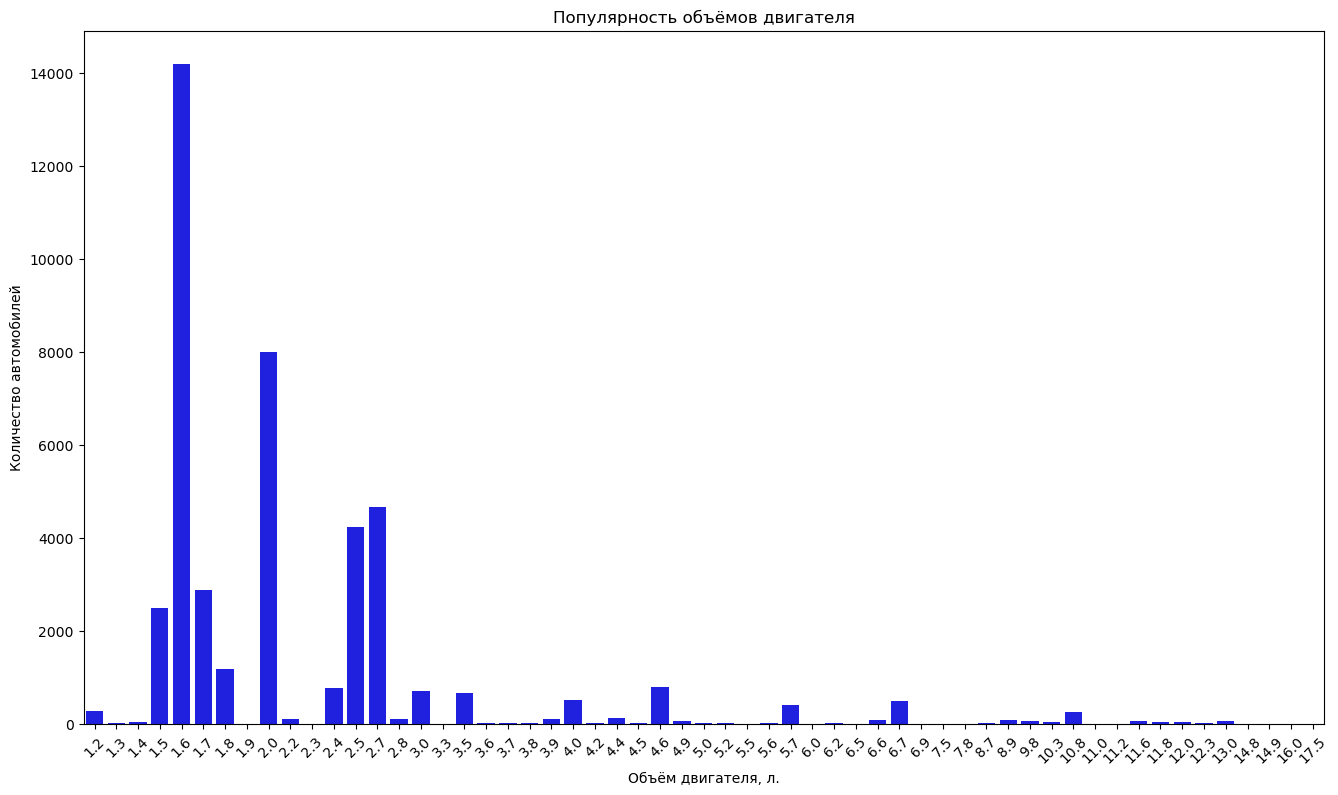

In [78]:
# Построение графика

plt.figure(figsize=(16, 9))
sns.barplot(data=cap, x='capacity_engine_new', y='quantity', color = 'blue')
plt.xlabel('Объём двигателя, л.')
plt.ylabel('Количество автомобилей')
plt.title('Популярность объёмов двигателя')
plt.xticks(rotation = 45)
plt.show()


In [79]:
print('Пропусков в столбце с объёмом двигателя после обработки:',
      data['capacity_engine_new'].isna().sum())

Пропусков в столбце с объёмом двигателя после обработки: 46


### Обработка данных столбца  transmission ( Тип коробки передач)

In [80]:
# Вывод уникальных значений столбца "Коробка передач"

data['transmission'].unique()

array(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ', nan,
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', 'АКПП6', 'АКПП4',
       '9AT', 'АКПП', 'АКПП8', 'МКПП4', 'МКПП5', 'CVT (вариатор)',
       'CVT(вариATор)', 'CVТ(вариатор)', '6AT/MT', '9АТ', '12AT', '7AT',
       '7АТ', '6М/Т', '6M/T', '6M/Т', 'PDK', '8АКПП', '8-ступ АКПП', '8',
       ' -', '-', '7 DSG', '7DSG', '6 DSG', '6DSG', 'CVТ(вАриАтор)',
       '5MТ', 'АТ (автомат)', '8 AT 4Motion', '8АТ4МoТion', '6A', '5M',
       '6-ступАКПП', '6А', 'AT (автомат)', '7DSG4МoТion', '6Aвтомат',
       '6Aатомат', '5М', '5-ступМТ', 'АT', 'A/T', '7АT', 'МТ (механика)',
 

In [81]:
print('Пропусков в столбце с типом коробки передач до обработки:',
      data['transmission'].isna().sum())

Пропусков в столбце с типом коробки передач до обработки: 1297


В столбце много пропусков, которые нужно заполнить. Также, необходимо унифицировать записи, приведя к единой форме записи.

In [82]:
# Последовательный вывод подозрительных значений

# data.loc[data.loc[:,'transmission'] == 'N']
# data.loc[data.loc[:,'transmission'] == '6AT/MT']
# data.loc[data.loc[:,'transmission'] == '8']
# data.loc[data.loc[:,'transmission'] == ' -']
data.loc[data.loc[:,'transmission'] == '-']


,month,company,brand,model,release,made_in,transmission,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new
20244,08.2019,Scania Central Asia,Scania,R-Series,2018,NL,-,-,Алматы,2.0,107835.04987,215670.09974,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,13.0


In [83]:
# Значения из столбца "Коробка передач" определяемые как автоматическая коробка передач

ak = ['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic', 'ТipТronic', 'Tiptronic',
      'Автомат', 'AT', '6 АТ', '6AT', '6АT', 'Powershift S6', 'PowershiftS6', '6 AT', '8АТ',
      '5AT', '5АТ', 'АТ', 'CVT', 'CVT(вариатор)', 'CVТ', '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT',
      '4AT', 'АКПП6', 'АКПП4', '9AT', 'АКПП', 'АКПП8', 'CVT (вариатор)', 'CVT(вариATор)',
      'CVТ(вариатор)', '9АТ', '12AT', '7AT', '7АТ', 'PDK', '8АКПП', '8-ступ АКПП',
      'CVТ(вАриАтор)', 'АТ (автомат)', '8 AT 4Motion', '8АТ4МoТion', '6A', '6-ступАКПП',
      '6А', 'AT (автомат)', '6Aвтомат', '6Aатомат', 'АT', 'A/T', '7АT', '8', ' -', '-']

In [84]:
# Значения из столбца "Коробка передач" определяемые как механическая коробка передач

mk = ['5 МТ', '5MT', '5МТ', 'MT', 'МТ', 'MТ', '6MT', '6МТ', '6MТ', 'Мех.', 'МКПП', '6 MT',
      '7DCT', '7 DCT', '7DCТ', '6 МТ', 'МКПП4', 'МКПП5', '6М/Т', '6M/T', '6M/Т', '7 DSG',
      '7DSG', '6 DSG', '6DSG', '5MТ', '5M', '7DSG4МoТion', '5М', '5-ступМТ', 'МТ (механика)',
      'Механическая', 'N', '6AT/MT']

In [85]:
# Функция для унификации записей в столбце "Коробка передач"

def transmission_func(row):
    if row in ak:
        result = 'AK'
    elif row in mk:
        result = 'MK'
    else:
        result = np.nan
    return result

In [86]:
# Замена записей в столбце "Коробка передач"

data['transmission'] = data['transmission'].apply(transmission_func)

In [87]:
# Проверка выполнения замены записей в столбце "Коробка передач"

data['transmission'].unique()

array(['AK', nan, 'MK'], dtype=object)

In [88]:
# Промежуточный просмотр количества переопределённых записей

data['transmission'].value_counts()

AK    19719
MK    10094
Name: transmission, dtype: int64

In [89]:
# Создание копии таблицы

data_3 = data.copy()

In [90]:
# Замена в копии таблицы всех пропущенных значений типов коробок передач нулями

data_3['transmission'] = data_3['transmission'].fillna('0')

In [91]:
# Выделение в отдельную таблицу строк с отстутвующим значением типов коробок передач

data_3 = data_3.loc[data_3.loc[:,'transmission'] == '0']

In [92]:
# Вывод моделей, у которых отсутствует запись о типе коробки передач

data_3['model'].unique()

array(['3 серия', '5 серия', '7 серия', 'i3', 'X1', 'X3', 'X4', 'X5',
       'X6', 'Aveo', 'Captiva', 'Tahoe', 'Tracker', 'EcoSport', 'Fiesta',
       'Focus', 'Kuga', 'Mondeo', 'BJ1032V3JB3-S', 'BJ3143DKPGA-1',
       'BJ3253DMPKB-AD', 'BJ5032V3BB3-S', 'BJ5163VKCHN-1', 'Accent',
       'Creta', 'Elantra', 'Santa Fe', 'Sonata', 'HD 78', 'Universe',
       'Tucson', 'Q30', 'Q50', 'QX50', 'D-MAX', 'FVR34', 'NMR', 'NPR',
       'NQR71', 'S3', 'F-Pace', 'XE', 'XF', 'Cerato', 'Optima', 'Rio',
       'Sorento', 'Soul', 'Sportage', 'Discovery', 'Range Rover',
       'Range Rover Evoque', 'Range Rover Sport', 'ES', 'TG', '3', '6',
       'CX-5', 'A-Class', 'C-Class', 'CLA-Class', 'E-Class', 'G-Class',
       'GLC-Class', 'GLE-Class', 'GLS-Class', 'Maybach S500', 'S-Class',
       'Cooper', 'Countryman', 'Terrano', '301', 'Duster', 'Kaptur',
       'Koleos', 'Logan', 'Sandero', 'G-Series', 'P-Series', 'R-Series',
       'SX3256DR384', 'SX5256GJBDR384', 'Octavia', 'Rapid', 'New Actyon',
       '

Вывод списка моделей автомобилей, для которых отсутствует запись о типе коробки передач также  показывает, что часто нет записей для грузовиков, и для очень популярных бюджетных автомобилей, типа Ford 'Fiesta', VW 'Jetta', VW 'Polo' и др. Также, как и при обработке данных предыдущего столбца решаю, что без анализа сектора коммерческих автомобилей и популярных бюджетных автомобилей анализ рынка автомобилей недостаточен.


Восполнение данных по модели автомобиля трудоёмко, но в данном случае необходимо восполнить хотя бы часть данных. К тому же, для части строк нужные данные содержатся в других строках.


При заполнении недостающих данных, в случае неопределённости (когда одна и та же модель может оснащаться двигателями разного объёма) выбор делается в пользу наиболее популярной модификации для этой таблицы (при достаточном количестве строк с заполненными данными). 


In [93]:
# Последовательный вывод строк моделей автомобилей без указания типа коробки передач

# data.loc[data.loc[:,'model'] == '3 серия']
# data.loc[data.loc[:,'model'] == '5 серия']
# data.loc[data.loc[:,'model'] == '7 серия']
# data.loc[data.loc[:,'model'] == 'i3']
# data.loc[data.loc[:,'model'] == 'X1']
# data.loc[data.loc[:,'model'] == 'X3']
# data.loc[data.loc[:,'model'] == 'X4']
# data.loc[data.loc[:,'model'] == 'X5']
# data.loc[data.loc[:,'model'] == 'X6']
# data.loc[data.loc[:,'model'] == 'Aveo']
# data.loc[data.loc[:,'model'] == 'Captiva']
# data.loc[data.loc[:,'model'] == 'Tahoe']
# data.loc[data.loc[:,'model'] == 'Tracker']
# data.loc[data.loc[:,'model'] == 'EcoSport']
# data.loc[data.loc[:,'Модель'] == 'Fiesta']
# data.loc[data.loc[:,'Модель'] == 'Focus']
# data.loc[data.loc[:,'Модель'] == 'Kuga']
# data.loc[data.loc[:,'Модель'] == 'Mondeo']
# data.loc[data.loc[:,'Модель'] == 'Accent']
# data.loc[data.loc[:,'Модель'] == 'Creta']
# data.loc[data.loc[:,'Модель'] == 'Elantra']
# data.loc[data.loc[:,'Модель'] == 'Santa Fe']
# data.loc[data.loc[:,'Модель'] == 'Sonata']
# data.loc[data.loc[:,'Модель'] == 'HD 78']
# data.loc[data.loc[:,'Модель'] == 'Universe']
# data.loc[data.loc[:,'Модель'] == 'Tucson']
# data.loc[data.loc[:,'Модель'] == 'Q30']
# data.loc[data.loc[:,'Модель'] == 'Q50']
# data.loc[data.loc[:,'Модель'] == 'QX50']
# data.loc[data.loc[:,'Модель'] == 'D-MAX']
# data.loc[data.loc[:,'Модель'] == 'FVR34']
# data.loc[data.loc[:,'Модель'] == 'NMR']
# data.loc[data.loc[:,'Модель'] == 'S3']
# data.loc[data.loc[:,'Модель'] == 'F-Pace']
# data.loc[data.loc[:,'Модель'] == 'XE']
# data.loc[data.loc[:,'Модель'] == 'Cerato']
# data.loc[data.loc[:,'Модель'] == 'Optima']
# data.loc[data.loc[:,'Модель'] == 'Rio']
# data.loc[data.loc[:,'Модель'] == 'Sorento']
# data.loc[data.loc[:,'Модель'] == 'Soul']
# data.loc[data.loc[:,'Модель'] == 'Sportage']
# data.loc[data.loc[:,'Модель'] == 'Discovery']
# data.loc[data.loc[:,'Модель'] == 'Range Rover']
# data.loc[data.loc[:,'Модель'] == 'ES']
# data.loc[data.loc[:,'Модель'] == 'TG']
# data.loc[data.loc[:,'Модель'] == 'A-Class']
# data.loc[data.loc[:,'Модель'] == 'Logan']
# data.loc[data.loc[:,'Модель'] == 'Countryman']
# data.loc[data.loc[:,'Модель'] == 'Terrano']
# data.loc[data.loc[:,'Модель'] == 'Cooper']
# data.loc[data.loc[:,'Модель'] == '301']
# data.loc[data.loc[:,'Модель'] == 'Duster']
# data.loc[data.loc[:,'Модель'] == 'Kaptur']
# data.loc[data.loc[:,'Модель'] == 'Koleos']
# data.loc[data.loc[:,'Модель'] == 'Sandero']
# data.loc[data.loc[:,'Модель'] == 'G-Series']
# data.loc[data.loc[:,'Модель'] == 'P-Series']
# data.loc[data.loc[:,'Модель'] == 'SX3256DR384']
# data.loc[data.loc[:,'Модель'] == 'SX5256GJBDR384']
# data.loc[data.loc[:,'Модель'] == 'Octavia']
# data.loc[data.loc[:,'Модель'] == 'Rapid']
# data.loc[data.loc[:,'Модель'] == 'New Actyon']
# data.loc[data.loc[:,'Модель'] == 'Amarok']
# data.loc[data.loc[:,'Модель'] == 'Caravelle']
# data.loc[data.loc[:,'Модель'] == 'Jetta']
data.loc[data.loc[:,'model'] == 'Passat B8']
# data.loc[data.loc[:,'Модель'] == 'Polo']
# data.loc[data.loc[:,'Модель'] == 'Tiguan']
# data.loc[data.loc[:,'Модель'] == 'Touareg']
# data.loc[data.loc[:,'Модель'] == 'Transporter']
# data.loc[data.loc[:,'Модель'] == '5557']
# data.loc[data.loc[:,'Модель'] == 'Q60']
# data.loc[data.loc[:,'Модель'] == 'CX-9']
# data.loc[data.loc[:,'Модель'] == 'Range Rover Velar']
# data.loc[data.loc[:,'Модель'] == 'Escalade']
# data.loc[data.loc[:,'Модель'] == 'GLC Coupe']
# data.loc[data.loc[:,'Модель'] == 'E-PACE']
# data.loc[data.loc[:,'Модель'] == 'Dokker']
# data.loc[data.loc[:,'Модель'] == 'SX3258DR384']
# data.loc[data.loc[:,'Модель'] == 'S-Series']
# data.loc[data.loc[:,'Модель'] == 'NQR']
# data.loc[data.loc[:,'Модель'] == 'X2']
# data.loc[data.loc[:,'model'] == 'Ghost']
# data.loc[data.loc[:,'Модель'] == 'FORWARD 18']


,month,company,brand,model,release,made_in,transmission,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new
31361,01.2019,Mercur Auto,Volkswagen,Passat B8,2017,GE,MK,NaN,Алматы,1.0,33798.240476,33798.240476,Легковые автомобили,D класс,Бензин,1.8
31362,01.2019,Mercur Auto,Volkswagen,Passat B8,2017,GE,MK,NaN,Алматы,1.0,32446.310857,32446.310857,Легковые автомобили,D класс,Бензин,1.8
31363,02.2019,Mercur Auto,Volkswagen,Passat B8,nan,GE,NaN,NaN,Алматы,1.0,33872.500000,33872.500000,Легковые автомобили,D класс,Бензин,1.8
31364,03.2019,Mercur Auto,Volkswagen,Passat B8,2017,GE,MK,FWD,Атырау,1.0,35859.346867,35859.346867,Легковые автомобили,D класс,Бензин,1.8
31365,03.2019,Mercur Auto,Volkswagen,Passat B8,2017,GE,MK,NaN,Алматы,1.0,28063.836679,28063.836679,Легковые автомобили,D класс,Бензин,1.8
31366,04.2019,Mercur Auto,Volkswagen,Passat B8,2017,GE,MK,FWD,Алматы,2.0,35414.254391,70828.508783,Легковые автомобили,D класс,Бензин,1.8
31367,04.2019,Mercur Auto,Volkswagen,Passat B8,2017,GE,MK,FWD,Алматы,2.0,37138.774605,74277.549210,Легковые автомобили,D класс,Бензин,1.8
31368,05.2019,Mercur Auto,Volkswagen,Passat B8,2017,GE,MK,FWD,Алматы,1.0,32538.658459,32538.658459,Легковые автомобили,D класс,Бензин,1.8
31369,06.2019,Mercur Auto,Volkswagen,Passat B8,2017,GE,MK,FWD,Атырау,1.0,31192.573197,31192.573197,Легковые автомобили,D класс,Бензин,1.8
31370,07.2019,Mercur Auto,Volkswagen,Passat B8,2017,RU,NaN,NaN,Астана,1.0,30452.430259,30452.430259,Легковые автомобили,D класс,NaN,1.8


In [94]:
# Список моделей автомобилей с механической коробкой передач

model_mk = ['BJ1032V3JB3-S', 'BJ3143DKPGA-1', 'BJ5032V3BB3-S', 'HD 78', 'Universe', 'D-MAX', 'NMR',
           'NQR71', 'TG', 'Logan', 'Terrano', 'G-Class', 'SX3256DR384', 'SX5256GJBDR384', 'Passat B8',
           'Transporter', '4320', '4320-1951-60', '43206-0551', '5557', 'Dokker', 'SX3258DR384',
           'ЕА-17У']

In [95]:
# Список моделей автомобилей с автоматической коробкой передач

model_ak = ['3 серия', '5 серия', '7 серия', 'i3', 'X1', 'X3', 'X4', 'X5', 'X6', 'Aveo', 'Captiva',
           'Tahoe', 'Tracker', 'EcoSport', 'Fiesta', 'Focus', 'Kuga', 'Mondeo', 'BJ3253DMPKB-AD',
           'BJ5163VKCHN-1', 'Accent', 'Creta', 'Elantra', 'Santa Fe', 'Sonata', 'Tucson', 'Q30',
           'Q50', 'QX50', 'FVR34', 'NPR', 'S3', 'F-Pace', 'XE', 'XF', 'Cerato', 'Optima', 'Rio',
           'Sorento', 'Soul', 'Sportage', 'Discovery', 'Range Rover', 'Range Rover Evoque',
            'Range Rover Sport', 'ES', '3.0', '6', 'CX-5', 'A-Class', 'C-Class', 'CLA-Class',
            'E-Class', 'GLC-Class', 'GLE-Class', 'GLS-Class', 'Countryman', 'Cooper', '301', 'Duster',
           'Kaptur', 'Koleos', 'Sandero', 'G-Series', 'P-Series', 'R-Series', 'Octavia', 'Rapid',
           'New Actyon', 'Amarok', 'Caravelle', 'Jetta', 'Polo', 'Tiguan', 'Touareg', 'Q60', 'CX-9',
           'Range Rover Velar', 'Escalade', 'GLC Coupe', 'E-PACE', 'S-Series', 'NQR', 'X2', 'Ghost',
           'FORWARD 18']

In [96]:
# Функция для восполнения записей в столбце "Коробка передач" по модели автомобиля

def model_transmission(row):
    if row in model_ak:
        result = 'AK'
    elif row in model_mk:
        result = 'MK'
    else:
        result = np.nan
    return result

In [97]:
# Восполнение записей в столбце "Коробка передач"

data['transmission_new_1'] = data['model'].apply(model_transmission)

In [98]:
# Объединение вновь сформированных столбцов, объединение данных в них

data['transmission_new'] = data['transmission_new_1'].fillna(data['transmission'])

In [99]:
# Удаление неактуальных столбцов

data = data.drop(columns=['transmission', 'transmission_new_1'])

In [100]:
# Вывод уникальных значений столбца

data['transmission_new'].unique()

array(['AK', 'MK', nan], dtype=object)

In [101]:
# Подсчёт уникальных значений столбца

data.groupby('transmission_new', as_index = False)['quantity'].sum()

,transmission_new,quantity
0,AK,26972.0
1,MK,16961.0


In [102]:
# Вывод информации о столбце

data['transmission_new'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32854 entries, 0 to 32853
Series name: transmission_new
Non-Null Count  Dtype 
--------------  ----- 
32834 non-null  object
dtypes: object(1)
memory usage: 256.8+ KB


In [103]:
print('Пропусков в столбце с типом коробки передач после обработки:',
      data['transmission_new'].isna().sum())

Пропусков в столбце с типом коробки передач после обработки: 20


### Обработка данных столбца type_drive (Тип привода)

In [104]:
# Вывод уникальных значений столбца "Тип привода"

data['type_drive'].unique()

array([nan, 'FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD',
       'Полный', 'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ',
       'задний', '2WD', '2 WD', '4 WD', '4х4', '4х2', '4x2', 'FR',
       '2WD/4WD', '2х4', '4x4', 'CVT', ' -', '-', 'P/TIME', 'FF',
       'полный', '4Motion', 'передний '], dtype=object)

In [105]:
print('Пропусков в столбце с типом привода до обработки:', data['type_drive'].isna().sum())

Пропусков в столбце с типом привода до обработки: 2382


В столбце много пропусков, которые нужно заполнить. Также, необходимо унифицировать записи, приведя к единой форме записи.

In [106]:
# Последовательный вывод подозрительных значений

# data.loc[data.loc[:,'type_drive'] == 'AWD']
# data.loc[data.loc[:,'type_drive'] == '2WD']
# data.loc[data.loc[:,'type_drive'] == '2 WD']
# data.loc[data.loc[:,'type_drive'] == '4х2']
# data.loc[data.loc[:,'type_drive'] == '4x2']
# data.loc[data.loc[:,'type_drive'] == '4х2.2']
# data.loc[data.loc[:,'type_drive'] == 'FR']
# data.loc[data.loc[:,'type_drive'] == '2х4']
# data.loc[data.loc[:,'type_drive'] == '2WD/4WD']
# data.loc[data.loc[:,'type_drive'] == 'CVT']
# data.loc[data.loc[:,'type_drive'] == ' -']
data.loc[data.loc[:,'type_drive'] == '-']
# data.loc[data.loc[:,'type_drive'] == 'P/TIME']
# data.loc[data.loc[:,'type_drive'] == 'FF']


,month,company,brand,model,release,made_in,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new
20244,08.2019,Scania Central Asia,Scania,R-Series,2018,NL,-,Алматы,2.0,107835.049870,2.156701e+05,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,13.0,AK
20245,09.2019,Scania Central Asia,Scania,R-Series,2018,NL,-,Алматы,15.0,104969.272631,1.574539e+06,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,13.0,AK


Необходимо привести к унифицированной записи типа привода автомобиля, заполнить пропущенные значения. 

Последовательно унифицирую и восполняю записи на основе существующих записей типа привода, модели, бренда автомобиля.


In [107]:
# Значения из столбца "Тип привода" определяемые как задний привод

backw = ['4х2.2', 'FR', '4х2', '-', ' -', 'RWD', 'Задний']

In [108]:
# Значения из столбца "Тип привода" определяемые как передний привод

forwardw = ['FF', 'передний', 'Передний', 'передний ', 'FWD']

In [109]:
# Значения из столбца "Тип привода" определяемые как полный привод

fullw = ['AWD', '2WD/4WD', 'CVT', 'P/TIME', 'quattro', 'Quattro', 'Полный ', '4 WD', '4х4', '4x4',
        'полный', '4Motion', '4WD']

In [110]:
# функция для унификации записей в столбце "Тип привода" на основе существующих записей типа привода

def wd_func(row):
    if row in backw:
        result = 'RWD'
    elif row in forwardw:
        result = 'FWD'
    elif row in fullw:
        result = '4WD'
    else:
        result = np.nan
    return result

In [111]:
# Восполнение записей

data['type_drive_new_1'] = data['type_drive'].apply(wd_func)

In [112]:
data.head(2)

,month,company,brand,model,release,made_in,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_1
0,03.2019,Mercur Auto,Audi,A3,2017,GE,NaN,Алматы,1.0,31250.0,31250.0,Легковые автомобили,C класс,Бензин,1.4,AK,NaN
1,05.2019,Mercur Auto,Audi,A3,2018,GE,FWD,Алматы,1.0,30581.0,30581.0,Легковые автомобили,C класс,Бензин,1.4,AK,FWD


In [113]:
# Последовательный вывод уникальных значений столбца "Модель" для последующего исследования 

# model_non_wd = data.loc[data.loc[:,'type_drive'] == '2WD']
# model_non_wd = data.loc[data.loc[:,'type_drive'] == '2 WD']
# model_non_wd = data.loc[data.loc[:,'type_drive'] == '4x2']
model_non_wd = data.loc[data.loc[:,'type_drive'] == '2х4']

In [114]:
# Вывод уникальных значений моделей автомобилей без указания типа привода на текущем этапе

model_non_wd['model'].unique()

array(['A-Class', 'C-Class', 'CLA-Class', 'E-Class', 'Sprinter',
       'V-Class', 'Jetta', 'Polo'], dtype=object)

In [115]:
# Ячейка для подстановки конкретных значений моделей автомобилдей для определения 
# типа привода автомобиля

model = model_non_wd.loc[data.loc[:,'model'] == 'Jetta']
model.head(2)

,month,company,brand,model,release,made_in,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_1
31275,03.2019,Mercur Auto,Volkswagen,Jetta,2017,RU,2х4,Уральск,1.0,22876.080558,22876.080558,Легковые автомобили,C класс,Бензин,1.6,AK,NaN


In [116]:
# Список моделей автомобилей с задним типом привода

model_b = ['TQ-1/H-1', 'County', 'H350', 'HD 160', 'HD 170', 'HD 260', 'HD 65', 'HD 72', 'HD 78',
           'Universe', 'FVR34', 'NMR' ,'NPR', 'Daily', 'Daily A', 'Daily V', 'Boxter', 'HD 35',
           '5516Х5', 'X200', 'N120', 'N75', 'N944S', '300', 'HFF6111K10EV21', '500', 'HFF6850HGQ4',
          'N56', 'Stralis', 'E-Class', 'S-Class', 'Actros', 'Sprinter', 'V-Class', 'Vito', 'C-Class',
          'SX3256DR384', 'SX5256GJBDR384', 'SX3258DR384', '4308', '43114', '43253', '43502', '45142',
           '45143', '5350', '53504', '53605', '5490', '5814', '65111',  '65116', '65117', '6520',
           '65206', '65225', '65806', '66052', '66062', '66065', 'КО 829Б ', 'КО-505А', '65224',
           'АКН-10', '2310', '2705', '2752', '3221', '3302', '3308', '3309', 'Next']

In [117]:
# Список моделей автомобилей с передним типом привода

model_f = ['Accent', 'Creta', 'Elantra', 'Grandeur', 'Sonata', 'Tucson', 'S3', 'S5', 'ES', 'ASX',
           'Outlander', 'Qashqai', 'X-Trail', '3008', '301', 'Partner Panel Van', 'Partner Tepee',
           'Gentra', 'Nexia R3', 'R2', 'R4', 'New Actyon', 'Tivoli', 'Corolla', 'Jetta', 'Polo',
           'Tiguan', 'Eclipse Cross', 'iev', 'i3', '508', 'Kaptur', 'A-Class', 'CLA-Class', 'A3']

In [118]:
# Список моделей автомобилей с полным типом привода

model_4 = ['43118', '65115', '53215', '44108', '6460', '2217']

In [119]:
# Функция для унификации и восполнения записей в столбце "Тип привода"
# в зависимости от модели автомобиля

def wd_model_func(row):
    if row in model_b:
        result = 'RWD'
    elif row in model_f:
        result = 'FWD'
    elif row in model_4:
        result = '4WD'
    else:
        result = np.nan
    return result

In [120]:
# Восполнение записей по модели автомобиля

data['type_drive_new_2'] = data['model'].apply(wd_model_func)

In [121]:
data.head(2)

,month,company,brand,model,release,made_in,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_1,type_drive_new_2
0,03.2019,Mercur Auto,Audi,A3,2017,GE,NaN,Алматы,1.0,31250.0,31250.0,Легковые автомобили,C класс,Бензин,1.4,AK,NaN,FWD
1,05.2019,Mercur Auto,Audi,A3,2018,GE,FWD,Алматы,1.0,30581.0,30581.0,Легковые автомобили,C класс,Бензин,1.4,AK,FWD,FWD


Наименование бренда некоторых автомобилей позволяет судить о типе привода этих автомобилей.

In [122]:
# Список брендов автомобилей с полным приводом

brand_full_w = ['Урал', 'Land Rover']

In [123]:
# Список брендов автомобилей с задним приводом

brand_back_w = ['MAN', 'Foton', 'Hyundai Truck & Bus', 'Mercedes-Benz Trucks', 'Scania']

In [124]:
# функция для унификации и восполнения записей в столбце "Тип привода"
# в зависимости от бренда автомобиля

def wd_brand_func(row):
    if row in brand_back_w:
        result = 'RWD'
    elif row in brand_full_w:
        result = '4WD'
    else:
        result = np.nan
    return result

In [125]:
# Восполнение записей по бренду автомобиля

data['type_drive_new_3'] = data['brand'].apply(wd_brand_func)

In [126]:
data.head(2)

,month,company,brand,model,release,made_in,type_drive,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_1,type_drive_new_2,type_drive_new_3
0,03.2019,Mercur Auto,Audi,A3,2017,GE,NaN,Алматы,1.0,31250.0,31250.0,Легковые автомобили,C класс,Бензин,1.4,AK,NaN,FWD,NaN
1,05.2019,Mercur Auto,Audi,A3,2018,GE,FWD,Алматы,1.0,30581.0,30581.0,Легковые автомобили,C класс,Бензин,1.4,AK,FWD,FWD,NaN


In [127]:
# Объединение вновь сформированных столбцов, объединение данных в них

data['type_drive_new'] = data['type_drive_new_1'].fillna(data['type_drive_new_2'])
data['type_drive_new'] = data['type_drive_new'].fillna(data['type_drive_new_3'])

In [128]:
# Удаление неактуальных столбцов

data = data.drop(columns=['type_drive', 'type_drive_new_1', 'type_drive_new_2',
                          'type_drive_new_3'])

In [129]:
# Просмотр ункальных значений в столбце

data['type_drive_new'].unique()

array(['FWD', '4WD', 'RWD', nan], dtype=object)

In [130]:
data.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new
0,03.2019,Mercur Auto,Audi,A3,2017,GE,Алматы,1.0,31250.0,31250.0,Легковые автомобили,C класс,Бензин,1.4,AK,FWD
1,05.2019,Mercur Auto,Audi,A3,2018,GE,Алматы,1.0,30581.0,30581.0,Легковые автомобили,C класс,Бензин,1.4,AK,FWD


In [131]:
print('Промежуточное число пропусков в столбце с типом привода:',
      data['type_drive_new'].isna().sum())

Промежуточное число пропусков в столбце с типом привода: 1400


На текущем этапе остаётся большое количество пропусков. Необходимо заполнить максимальное число пропусков.

In [132]:
# Создание копии таблицы

data_4 = data.copy()

In [133]:
# Замена в копии таблицы всех пропущенных значений типа привода нулями

data_4['type_drive_new'] = data_4['type_drive_new'].fillna('0')

In [134]:
# Выделение в отдельную таблицу строк с отстутвующим значением типа привода

data_4 = data_4.loc[data_4.loc[:,'type_drive_new'] == '0']

In [135]:
# Вывод моделей, у которых отсутствует запись о типе привода

data_4['model'].unique()

array(['3 серия', '5 серия', '7 серия', 'X1', 'X3', 'X5', 'X6', 'Captiva',
       'Tracker', 'Q30', 'Q50', 'QX50', 'D-MAX', 'NQR71', 'F-Pace', 'XE',
       'XF', 'Sorento', 'Sportage', '4x4', '4x4 Pickup', 'ВИС', '3', '6',
       'CX-5', 'Duster', 'Koleos', 'Logan', 'Sandero', 'Superb B6',
       '2206', '2360', '3151', '3303', '3741', '3909', '3962', 'Cargo',
       'Patriot', 'Patriot Pickup', 'Amarok', 'Caravelle',
       'Crafter Kasten', 'Passat B8', 'Touareg', 'Transporter',
       'Transporter Kasten', 'Q60', 'CX-9', 'Kodiaq', 'E-PACE', 'Dokker'],
      dtype=object)

In [136]:
# Последовательный вывод строк моделей автомобилей без указания типа типа привода

# data.loc[data.loc[:,'model'] == '3 серия']
# data.loc[data.loc[:,'model'] == '5 серия']
# data.loc[data.loc[:,'model'] == '7 серия']
# data.loc[data.loc[:,'model'] == 'X1']
# data.loc[data.loc[:,'model'] == 'X3']
# data.loc[data.loc[:,'model'] == 'X5']
# data.loc[data.loc[:,'model'] == 'X6']
# data.loc[data.loc[:,'model'] == 'Captiva']
# data.loc[data.loc[:,'model'] == 'Tracker']
# data.loc[data.loc[:,'model'] == 'Q30']
# data.loc[data.loc[:,'model'] == 'Q50']
# data.loc[data.loc[:,'model'] == 'QX50']
# data.loc[data.loc[:,'model'] == 'D-MAX']
# data.loc[data.loc[:,'model'] == 'NQR71']
# data.loc[data.loc[:,'model'] == 'F-Pace']
# data.loc[data.loc[:,'model'] == 'XE']
# data.loc[data.loc[:,'model'] == 'Sorento']
# data.loc[data.loc[:,'model'] == 'Sportage']
# data.loc[data.loc[:,'model'] == 'ВИС']
# data.loc[data.loc[:,'model'] == '3.0']
# data.loc[data.loc[:,'model'] == '6']
# data.loc[data.loc[:,'model'] == 'CX-5']
# data.loc[data.loc[:,'model'] == 'Duster']
# data.loc[data.loc[:,'model'] == 'Koleos']
# data.loc[data.loc[:,'model'] == 'Logan']
# data.loc[data.loc[:,'model'] == 'Sandero']
# data.loc[data.loc[:,'model'] == 'Superb B6']
data.loc[data.loc[:,'model'] == '2206']
# data.loc[data.loc[:,'model'] == '2360']
# data.loc[data.loc[:,'model'] == '3151']
# data.loc[data.loc[:,'model'] == '3303']
# data.loc[data.loc[:,'model'] == '3741']
# data.loc[data.loc[:,'model'] == '3909']
# data.loc[data.loc[:,'model'] == '3962']
# data.loc[data.loc[:,'model'] == 'Cargo']
# data.loc[data.loc[:,'model'] == 'Amarok']
# data.loc[data.loc[:,'model'] == 'Caravelle']
# data.loc[data.loc[:,'model'] == 'Crafter Kasten']
# data.loc[data.loc[:,'model'] == 'Passat B8']
# data.loc[data.loc[:,'model'] == 'Touareg']
# data.loc[data.loc[:,'model'] == 'Transporter']
# data.loc[data.loc[:,'model'] == 'Q60']
# data.loc[data.loc[:,'model'] == 'CX-9']
# data.loc[data.loc[:,'model'] == 'Kodiaq']
# data.loc[data.loc[:,'model'] == 'E-PACE']
# data.loc[data.loc[:,'model'] == 'Dokker']


,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new
30293,01.2019,Вираж,UAZ,2206,2017,RU,Усть-Каменогорск,1.0,15528.458652,15528.458652,Коммерческие автомобили,Микроавтобусы,Бензин,2.7,MK,4WD
30294,01.2019,БИПЭК АВТО,UAZ,2206,2017,RU,Актау,1.0,14200.000000,14200.000000,Коммерческие автомобили,Микроавтобусы,Бензин,2.7,MK,NaN
30295,01.2019,БИПЭК АВТО,UAZ,2206,2016,RU,Актобе,1.0,14200.000000,14200.000000,Коммерческие автомобили,Микроавтобусы,Бензин,2.7,MK,NaN
30296,02.2019,Вираж,UAZ,2206,2017,RU,Павлодар,1.0,17281.250000,17281.250000,Коммерческие автомобили,Микроавтобусы,Бензин,2.7,MK,4WD
30297,02.2019,Вираж,UAZ,2206,2017,RU,Актобе,1.0,17437.500000,17437.500000,Коммерческие автомобили,Микроавтобусы,Бензин,2.7,MK,4WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30382,09.2019,Вираж,UAZ,2206,2018,RU,Шымкент,1.0,16249.788698,16249.788698,Коммерческие автомобили,Микроавтобусы,Бензин,2.7,MK,4WD
30383,09.2019,Вираж,UAZ,2206,2018,RU,Караганда,1.0,16167.994460,16167.994460,Коммерческие автомобили,Микроавтобусы,Бензин,2.7,MK,4WD
30384,09.2019,Вираж,UAZ,2206,2018,RU,Костанай,1.0,16167.994460,16167.994460,Коммерческие автомобили,Микроавтобусы,Бензин,2.7,MK,4WD
30385,09.2019,Вираж,UAZ,2206,2018,RU,Кызылорда,1.0,16167.994460,16167.994460,Коммерческие автомобили,Микроавтобусы,Бензин,2.7,MK,4WD


In [137]:
# Список моделей автомобилей с задним приводом

model_b_2 = ['3 серия', '5 серия', 'Q50', 'NQR71', '2360', 'Crafter Kasten', 'Ghost']

In [138]:
# Список моделей автомобилей с передним приводом

model_f_2 = ['ВИС', '3.0', '6', 'CX-5', 'Logan', 'Sandero', 'Superb B6', 'Caravelle', 'Passat B8',
            'Transporter', 'Transporter Kasten', 'Dokker']

In [139]:
# Список моделей автомобилей с полным приводом

model_4_2 = ['7 серия', 'X1', 'X3', 'X5', 'X6', 'Captiva', 'Tracker', 'Q30', 'QX50', 'D-MAX',
             'F-Pace', 'XE', 'XF', 'Sorento', 'Sportage', '4x4', '4x4 Pickup', 'Duster', 'Koleos',
            '2206', '3151', '3303', '3741', '3909', '3962', 'Cargo', 'Patriot', 'Patriot Pickup',
            'Amarok', 'Touareg', 'Q60', 'CX-9', 'Kodiaq', 'E-PACE', ]

Судя по длине списков для каждого типа привода, в таблицу часто не заносились данные о внедорожниках. Возможно, такие данные подразумевались, как само собою разумеющееся. 

In [140]:
# Функция для восполнения записей в столбце "Тип привода" в зависимости от модели автомобиля

def model_w_2(row):
    if row in model_b_2:
        result = 'RWD'
    elif row in model_f_2:
        result = 'FWD'
    elif row in model_4_2:
        result = '4WD' 
    else:
        result = np.nan
    return result

In [141]:
# Восполнение записей в столбце "Тип привода"
 
data['type_drive_new_4'] = data['model'].apply(model_w_2)

In [142]:
# Объединение вновь сформированных столбцов, объединение данных в них

data['type_drive_new_new'] = data['type_drive_new_4'].fillna(data['type_drive_new'])

In [143]:
# Удаление неактуальных столбцов

data = data.drop(columns=['type_drive_new_4', 'type_drive_new'])

In [144]:
# Подсчёт уникальных значений столбца

data.groupby('type_drive_new_new', as_index = False)['quantity'].sum()

,type_drive_new_new,quantity
0,4WD,16676.0
1,FWD,23875.0
2,RWD,3391.0


In [145]:
print('Пропусков в столбце с типом привода после обработки:',
      data['type_drive_new_new'].isna().sum())

Пропусков в столбце с типом привода после обработки: 12


### Обработка данных столбца region (Регион)

In [146]:
# Вывод уникальных значений столбца "Регион"

data['region'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Уральск',
       'Усть-Каменогорск', 'Петропавловск', 'Павлодар', 'Кокшетау',
       'Актау', 'Семей', 'Караганда', 'Актобе', 'Шымкент', 'Талдыкорган',
       'Кызылорда', 'Экибастуз', 'Рудный', 'Тараз', 'Аксай', 'Щучинск',
       'ЭКСПОРТ', 'Риддер', 'Шемонаиха'], dtype=object)

In [147]:
print('Пропусков в столбце с регионом продажи автомобиля:', data['region'].isna().sum())

Пропусков в столбце с регионом продажи автомобиля: 0


In [148]:
# Вывод числа сделок в различных регионах

data['region'].value_counts()

Алматы              9264
Астана              7050
Атырау              2078
Костанай            2030
Шымкент             2025
Караганда           1749
Уральск             1457
Актау               1245
Актобе              1210
Усть-Каменогорск    1157
Павлодар            1004
Кызылорда            526
Петропавловск        462
Кокшетау             392
ЭКСПОРТ              298
Семей                268
Тараз                254
Талдыкорган          189
Экибастуз             89
Риддер                59
Рудный                38
Аксай                  5
Щучинск                4
Шемонаиха              1
Name: region, dtype: int64

In [149]:
# Подсчёт проданных автомобилей в различных регионах

data.groupby('region', as_index = False)['quantity'].sum().sort_values(by='quantity',
                                                                ascending = False).reset_index()

,index,region,quantity
0,3,Алматы,11626.0
1,4,Астана,8571.0
2,5,Атырау,3193.0
3,20,Шымкент,2737.0
4,8,Костанай,2660.0
5,6,Караганда,2646.0
6,17,Уральск,1880.0
7,1,Актау,1871.0
8,18,Усть-Каменогорск,1866.0
9,2,Актобе,1609.0


In [150]:
# Выделение в отдельную таблицу строк с автомобилями, проданными на экспорт

data_export = data.loc[data.loc[:,'region'] == 'ЭКСПОРТ']

data_export.head(3)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
10027,02.2019,Allur Auto,Jac,S3,2017,KZ,ЭКСПОРТ,1.0,12579.621014,12579.621014,Внедорожники,Компактные SUV,Бензин,1.5,AK,FWD
10028,02.2019,Allur Auto,Jac,S3,2017,KZ,ЭКСПОРТ,1.0,12579.621014,12579.621014,Внедорожники,Компактные SUV,Бензин,1.5,AK,FWD
10029,07.2019,Allur Auto,Jac,S3,2018,KZ,ЭКСПОРТ,1.0,11474.273077,11474.273077,Внедорожники,Компактные SUV,Бензин,1.5,AK,FWD


In [151]:
# Список компаний, продающих автомобили на экспорт

data_export['company'].unique()

array(['Allur Auto', 'БИПЭК АВТО', 'Toyota Motor Kazakhstan'],
      dtype=object)

In [152]:
# Список стран-производителей автомобилей, чьи автомобили были проданны казахстанскими компаниями
# на экспорт

data_export['made_in'].unique()

array(['KZ', 'JP', 'RU', 'TR', 'TH'], dtype=object)

### Обработка данных столбца quantity (Количество)

In [153]:
# Вывод уникальных значений столбца "Количество"

data['quantity'].unique()

array([ 1.,  3.,  2.,  4.,  5.,  6.,  7.,  8., 11.,  9., 10., 20., 18.,
       12., 37., 40., 17., 15., 24., 26., 13., nan, 19., 14., 25., 16.,
       22., 30., 21., 31., 46., 23., 29., 41., 33., 56., 28., 35., 36.,
       39., 34., 27., 38., 32., 91.])

In [154]:
print('Пропусков в столбце с количеством проданных автомобилей в сделке:',
      data['quantity'].isna().sum())

Пропусков в столбце с количеством проданных автомобилей в сделке: 5


In [155]:
# Замена обозначения количества

data['quantity'] = data['quantity'].replace('2.0', 2.0)
data['quantity'] = data['quantity'].replace('4.0', 4.0)

In [156]:
# Просмотр информации о столбце "Количество"

data['quantity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32854 entries, 0 to 32853
Series name: quantity
Non-Null Count  Dtype  
--------------  -----  
32849 non-null  float64
dtypes: float64(1)
memory usage: 256.8 KB


In [157]:
# Вывод наиболее часто встречающегося количества автомобилей в одной сделке

data['quantity'].value_counts().head(10)

1.0     30390
2.0       953
3.0       425
4.0       237
5.0       168
6.0       114
7.0       100
8.0        59
11.0       41
9.0        41
Name: quantity, dtype: int64

In [158]:
# Максимальное количество автомобилей в одной продаже

data['quantity'].max()

91.0

In [159]:
# Вывод уникальных значений столбца "Количество" после преобразований

data['quantity'].unique()

array([ 1.,  3.,  2.,  4.,  5.,  6.,  7.,  8., 11.,  9., 10., 20., 18.,
       12., 37., 40., 17., 15., 24., 26., 13., nan, 19., 14., 25., 16.,
       22., 30., 21., 31., 46., 23., 29., 41., 33., 56., 28., 35., 36.,
       39., 34., 27., 38., 32., 91.])

In [160]:
# Подсчёт количества проданных автомобилей

data.groupby('brand')['quantity'].sum().sum()

43957.0

### Обработка данных столбца price (Цена, USD)

In [161]:
# Округление цен до целых значений и перевод в целочисленный формат

data['price'] = data['price'].round().astype('int')

In [162]:
print('Пропусков в столбце с ценами:', data['price'].isna().sum())

Пропусков в столбце с ценами: 0


In [163]:
# Просмотр данных о продаже автомобиля по минимальной в таблице цене

data.loc[data['price'] != 0].min()

month                        01.2019
company                   Allur Auto
brand                          ANKAI
model                        1 серия
release                         2011
made_in                           AT
region                         Аксай
quantity                         1.0
price                           4571
sale                             0.0
segment                Внедорожники 
class_2013                  A класс 
capacity_engine_new              1.2
dtype: object

### Обработка данных столбца sale (Продажа, USD)

In [164]:
# Округление значений цен сделок до целых значений и перевод в целочисленный формат

data['sale'] = data['sale'].round().astype('int')

In [165]:
print('Пропусков в столбце с ценами сделок:', data['sale'].isna().sum())

Пропусков в столбце с ценами сделок: 0


In [166]:
# Вывод информации о столбце

data['sale'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32854 entries, 0 to 32853
Series name: sale
Non-Null Count  Dtype
--------------  -----
32854 non-null  int32
dtypes: int32(1)
memory usage: 128.5 KB


### Обработка данных столбца segment (Сегментация 2013)

In [167]:
# Вывод уникальных значений столбца

data['segment'].unique()

array(['Легковые автомобили ', 'Внедорожники ',
       'Коммерческие автомобили ', 'Минивэны', 'Пикапы '], dtype=object)

In [168]:
# Вывод уникальных значений столбца "Сегментация 2013"

data['segment'].value_counts()

Внедорожники                14267
Легковые автомобили         13342
Коммерческие автомобили      4251
Пикапы                        933
Минивэны                       61
Name: segment, dtype: int64

In [169]:
# Подсчёт количества автомобилей различных сегментов

data.groupby('segment')['quantity'].sum().sort_values(ascending = False)

segment
Легковые автомобили         20116.0
Внедорожники                17952.0
Коммерческие автомобили      4890.0
Пикапы                        937.0
Минивэны                       62.0
Name: quantity, dtype: float64

In [170]:
print('Пропусков в столбце с сегментацией автомобилей:', data['segment'].isna().sum())

Пропусков в столбце с сегментацией автомобилей: 0


### Обработка данных столбца class_2013 (Класс 2013)

In [171]:
# Вывод уникальных значений столбца "Класс 2013"

data['class_2013'].unique()

array(['C класс ', 'D класс ', 'Спортивные автомобили ', 'E класс ',
       'F класс ', 'Среднеразмерные SUV ', 'Стандартные SUV ', 'B класс ',
       'Компактные SUV ', 'Субкомпактные SUV ', 'Большие автобусы ',
       'Микроавтобусы ', 'Малотоннажные грузовики ',
       'Крупнотоннажные грузовики ', 'Развозные автомобили ',
       'Среднетоннажные грузовики ', 'Полноразмерный Минивэн ',
       'Средние автобусы ', 'Полноразмерные SUV ', 'Pick-ups', 'A класс ',
       'Компактвэн'], dtype=object)

In [172]:
# Подсчёт количества автомобилей различных классов

data.groupby('class_2013')['quantity'].sum().sort_values(ascending = False)

class_2013
B класс                       12121.0
Компактные SUV                 5687.0
Субкомпактные SUV              4516.0
E класс                        3831.0
C класс                        3730.0
Среднеразмерные SUV            3138.0
Стандартные SUV                2518.0
Малотоннажные грузовики        2187.0
Полноразмерные SUV             2093.0
Крупнотоннажные грузовики      1289.0
Pick-ups                        937.0
Развозные автомобили            844.0
Микроавтобусы                   291.0
D класс                         185.0
Большие автобусы                181.0
A класс                         159.0
F класс                          85.0
Среднетоннажные грузовики        73.0
Полноразмерный Минивэн           54.0
Средние автобусы                 25.0
Компактвэн                        8.0
Спортивные автомобили             5.0
Name: quantity, dtype: float64

In [173]:
print('Пропусков в столбце с классом автомобилей:', data['class_2013'].isna().sum())

Пропусков в столбце с классом автомобилей: 0


## Выводы по первичной обработке данных


1. #### Пропуски в данных 
В таблице 32854 строки. До обработки в таблице было много пропусков в разных столбцах, при этом, в столбцах "Сегментация 2013", "Класс 2013" пропусков не было. Преимущественно пропуски были в столбцах с технической информацией об автомобилях. Природа пропусков, видимо, различна для каждого такого столбца. Например, было много пропусков в стобце с указанием типа привода автомобиля для внедорожников, специальных полноприводных грузовиков (Урал). Предположительно, эти данные не вносились в таблицу как излишние, само собою разумееющиеся данные. Для некоторых марок автомобилей ни в одной строке не было данных об объёме двигателя, например: марка автомобиля КАМАЗ. Причина таких пропусков не ясна. Для более точного анализа я восстановил большую часть пропусков в данных. При восстановлении данных делались допущения, и при рассмотрении конкретной модели автомобиля могут встречаться ошибки, но на общую картину такие единичные ошибки повлиять не могут.


2. #### Временные рамки
В таблице представлены данные о продаже автомобилей в Казахстане с января по сентябрь 2019 года. Количество проданных автомобилей от месяца к месяцу меняется. Так, в январе было продано почти 3300 автомобилей, с февраля по апрель ежемесячно продавалось около 4300 автомобилей, с мая по сентябрь продавалось около 5500 автомобилей в месяц. 


3. #### Компании реализовавшие автомобили
В таблице представлены данные о продажах автомобилей 31-ой компанией. Лидером по количеству совершённых сделок является компания Toyota Motor Kazakhstan. Первая десятка компаний с указанием количества сделок выглядит так:

   * Toyota Motor Kazakhstan           10442
   * Astana Motors                     5746
   * БИПЭК АВТО                        3595
   * Вираж                             3358
   * УзАвто-Казахстан                  1727
   * Allur Auto                        1359
   * Renault Россия                    1088
   * Nissan Manufacturing RUS          1037
   * Mercur Auto                        940
   * ТК КАМАЗ                           888


4. #### Бренд / Марки автомобилей
В таблице представлены данные о продажах автомобилей 47-ми брендов. Лидирующими по количеству проданных автомбилей являются бренды: Lada и Toyota. Первая десятка брендов с указанием количества проданных автомобилей выглядит так:

* Lada                    9667
* Toyota                  9374
* Hyundai                 5703
* GAZ                     2111
* Kia                     1815
* Ravon                   1727
* Nissan                  1662
* Renault                 1339
* UAZ                     1085
* Lexus                   1068

5. #### Модели автомобилей
В таблице представлены данные о продажах 294-ёх моделей автомобилей. Лидером по количеству проданных автомбилей является автомобиль Toyota Camry. Первая десятка самых популярных моделей автомобилей с указанием количества проданных автомобилей выглядит так:

* Toyota Camry        3440
* Lada Granta         2771
* Lada 4x4            2329
* Hyundai Tucson      1890
* Lada Vesta          1843
* Lada Largus         1616
* Toyota LC Prado     1489
* Toyota RAV4         1348
* Hyundai Accent      1332
* Hyundai Creta       1202

6. #### Год выпуска проданных автомобилей
В таблице представлены данные о продаже автомобилей, произведённых с 2011 по 2018 годы. Автомобили 2018 года выпуска составляют более 75% от всех проданных автомобилей, а автомобили 2017 и 2018 годов выпуска более 99% от всех проданных автомобилей.

7. #### Страны-производители проданных автомобилей
В таблице представлены данные о продаже автомобилей, произведённых в Австрии, Белоруссии, Великобритании, Венгрии, Вьетнаме, Германии, Казахстане, Нидерландах, России, США, Таиланде, Турции, Узбекистане, Швеции, Южной Корее и Японии. Автомобили, произведённые в Казахстане, составляют более 47% от всех проданных автомобилей, а автомобили, произведённые в России и в Казахстане, более 78% от всех проданных автомобилей.

8. #### Виды топлива проданных автомобилей
Виды топлива проданных автомобилей разнообразны, однако автомобили с бензиновыми двигателями составляют более 94% от всех проданных автомобилей. Электрические автомобили и автомобили с гибридными двигателями составляют менее 0,13% от всех проданных автомобилей.

9. #### Объём двигателей проданных автомобилей
Объём двигателей автомобилей в таблице от 1,2 литра у автомобилей малого класса до 17,5 литров у тяжёлых грузовиков. Выделяются три набора самых популярных объёмов двигателя: 1.5, 1.6, 1.7 и 1.8 литра; 2 литра; 2.5, 2.7 литра. Самый популярный объём двигателя - 1.6 литра, почти треть от всех проданных автомобилей с таким объёмом двигателя.

10. #### Типы коробок передач проданных автомобилей
При унификации и восполонении данных, роботизированные коробки передач я относил к механическим коробкам передач. Т.о., после обработки данных в столбце остались только значения: автоматическая коробка передач и механическая коробка передач. Из всех проданных автомобилей около 61% автомобилей оснащены автоматической коробкой передач.

11. #### Типы привода проданных автомобилей
При унификации и восплонении данных существовала неопределённость с непостоянным (подключаемым) полным приводом. Однако, доля таких автомобилей невелика, и на общую картину искажения с неточным отнесением типа привода повлиять не могут. Наиболее популярный тип привода у проданных автомобилей - передний (около 54% от всех проданных автомобилей), полноприводных автомобилей около 38%, заднеприводных менее 8% от всех проданных автомобилей.

12. #### Количество проданных автомобилей
В таблице представлены данные о продаже 43 957 автомобилей. Некоторые модели покупаются партиями по несколько одинаковых автомобилей за раз. Однако, более двух третей покупок - это покупка одного автомобиля. 

13. #### Регионы продажи автомобилей
В таблице представлены данные о продаже автомобилей в разных регионах Казахстана, однако, более четверти всех проданных автомобилей были проданы в городе Алматы, а почти пятая часть в городе Астана. Часть строк в столбце "Регион" имеют значение "ЭКСПОРТ". Вероятно, в таких строках содержаться данные о продаже автомобилей за пределы Казахстана. Компании, реализующие автомобили на экспорт: 'Allur Auto', 'БИПЭК АВТО', 'Toyota Motor Kazakhstan'. Автомобили, реализуемые на экспорт, были произведены не только в Казахстане, но и в России, Таиланде, Турции, Японии.

14. #### Цены на проданные автомобили
Цены на проданные автомобили исчисляются в долларах США, значения цен в таблице широко варьируются. Более точный анализ цен изложен ниже в соответствующем разделе. Минимальная цена, за которую был продан автомобиль, составила 4571 доллар США.

15. #### Типы проданных автомобилей
Более 45% проданных автомобилей составляют легковые автомобили, ещё около 40% - внедорожники. Автомобили класса В (небольшие бюджетные автомобили) составляют около 27% от всех проданных автомобилей. Компактные и субкомпактные внедорожники составляют ещё около 23% от числа проданных автомобилей. В таблице также представлены данные о продаже различных классов грузовиков, автобусов и микроавтобусов, автомобилей представительского класса и спортивных автомбилей.


# Анализ данных

## Анализ автомобилей, закупаемых партиями

Проведу анализ автомобилей, закупаемых партиями от 10-ти штук.

In [174]:
# Формирование таблицы с автомобилями, закупаемыми партиями от 10-ти штук

data_more_10 = data.loc[data.loc[:,'quantity'] >= 10]
data_more_10.head(3)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
266,05.2019,Автоцентр-Бавария,BMW,X6,2017,US,Астана,11.0,67070,737771,Внедорожники,Компактные SUV,Бензин,3.0,AK,4WD
960,04.2019,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,2018,KZ,Атырау,10.0,100084,1000838,Коммерческие автомобили,Большие автобусы,Дизель,2.5,MK,RWD
962,05.2019,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,2018,KZ,Атырау,20.0,99046,1980922,Коммерческие автомобили,Большие автобусы,Дизель,2.5,MK,RWD


In [175]:
# Формирование сгруппированной таблицы с моделями автомбилей, закупаемыми партиями от 10-ти штук

data_more_10 = data_more_10.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     cars_max_qnt=('quantity', 'max'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     segment=('segment', 'first'),
                     class_2013=('class_2013', 'first')).\
                     sort_values(by = 'cars_max_qnt', ascending = False)\
                .reset_index()

data_more_10['cars_qnt'] = data_more_10['cars_qnt'].astype(int)
data_more_10['cars_max_qnt'] = data_more_10['cars_max_qnt'].astype(int)

data_more_10 = data_more_10.drop(columns=['index'])

data_more_10

,brand,model,made_in,release,cars_qnt,cars_max_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
0,Lada,Vesta,KZ,2018,496,91,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
1,Lada,4x4,KZ,2018,1618,56,Бензин,1.7,MK,4WD,Внедорожники,Субкомпактные SUV
2,Lada,Largus,KZ,2018,868,46,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
3,Lada,Granta,KZ,2018,1755,40,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
4,Kia,Optima,KZ,2018,57,40,Бензин,2.4,AK,FWD,Легковые автомобили,D класс
5,Kia,Cerato,KZ,2018,57,37,Бензин,1.6,AK,FWD,Легковые автомобили,C класс
6,Kia,Rio,RU,2018,77,37,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
7,Lada,4x4,KZ,2017,192,30,Бензин,1.7,MK,4WD,Внедорожники,Субкомпактные SUV
8,Lada,Largus,RU,2018,42,30,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
9,Skoda,Superb B6,KZ,2018,47,29,Бензин,2.0,MK,FWD,Легковые автомобили,E класс


In [176]:
# Подсчёт количества автомобилей различных стран-производителей

data_more_10.groupby('made_in')['cars_qnt'].sum().sort_values(ascending = False)

made_in
KZ    5845
RU     452
NL      42
UK      13
US      11
JP      10
Name: cars_qnt, dtype: int32

In [177]:
# Подсчёт количества автомобилей различных годов выпуска

data_more_10.groupby('release')['cars_qnt'].sum().sort_values(ascending = False)

release
2018    5778
2017     487
nan       98
2015      10
Name: cars_qnt, dtype: int32

In [178]:
# Подсчёт кол-ва моделей

data_more_10['model'].nunique()

31

In [179]:
# Подсчёт количества автомобилей различных сегментов

data_more_10.groupby('segment')['cars_qnt'].sum().sort_values(ascending = False)

segment
Легковые автомобили         3943
Внедорожники                2151
Коммерческие автомобили      279
Name: cars_qnt, dtype: int32

In [180]:
# Подсчёт количества автомобилей различных классов

data_more_10.groupby('class_2013')['cars_qnt'].sum().sort_values(ascending = False)

class_2013
B класс                       3623
Субкомпактные SUV             1810
Компактные SUV                 242
C класс                        216
Крупнотоннажные грузовики      118
Малотоннажные грузовики        104
Стандартные SUV                 86
D класс                         57
E класс                         47
Большие автобусы                46
Полноразмерные SUV              13
Микроавтобусы                   11
Name: cars_qnt, dtype: int32

В таблице представлены данные о продажах автомобилей партиями. При рассмотрении моделей автомобилей, посталяемых в количествах от 10-ти штук, выяснилось:

* подавляющее большинство таких автомобилей марки Lada;
* почти 93% этих автомбилей произведены в Казахстане;
* 92% из них выпущены в 2018 году (т.е., это новые автомобили);
* почти 57% из них относятся к классу В - малых городских автомобилей.


Ниже рассмотрю подробнее модели автомобилей, продаваемых партиями от 10-ти штук с разбивкой на самые популярные классы автомобилей:

* Автомобили класса В;
* Внедорожники;
* Малотоннажные грузовики;
* Крупнотоннажные грузовики.

#### B класс

In [181]:
# Формирование таблицы с автомобилями В класса

data_more_10_b = data_more_10.loc[data_more_10.loc[:, 'class_2013'] == 'B класс ']

In [182]:
# Вывод самых популярных моделей, поставляемых партиями 

data_more_10_b.sort_values(by='cars_qnt', ascending = False)

,brand,model,made_in,release,cars_qnt,cars_max_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
3,Lada,Granta,KZ,2018,1755,40,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
2,Lada,Largus,KZ,2018,868,46,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
0,Lada,Vesta,KZ,2018,496,91,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
15,Lada,Granta,KZ,2017,140,22,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
12,Kia,Rio,KZ,2018,110,26,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
6,Kia,Rio,RU,2018,77,37,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
11,Volkswagen,Polo,RU,nan,55,27,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
8,Lada,Largus,RU,2018,42,30,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
18,Volkswagen,Polo,RU,2018,38,20,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
16,Lada,Largus,RU,2017,32,22,Бензин,1.6,MK,FWD,Легковые автомобили,B класс


In [183]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_b = data.loc[((data['model'] == 'Vesta') | (data['model'] == 'Largus') |
                  (data['model'] == 'Granta') | (data['model'] == 'Rio') |
                  (data['model'] == 'Polo')) & (data['quantity'] == 1)]

data_b.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
11390,01.2019,БИПЭК АВТО,Kia,Rio,2018,KZ,Караганда,1.0,13500,13500,Легковые автомобили,B класс,Бензин,1.6,AK,FWD
11392,01.2019,БИПЭК АВТО,Kia,Rio,2018,KZ,Астана,1.0,13500,13500,Легковые автомобили,B класс,Бензин,1.6,AK,FWD


In [184]:
# Формирование таблицы с выводом ценовых характеристик моделей, поставляемых партиями

data_b = data_b.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
            .agg(price_mean=('price', 'mean'),
                price_median=('price', 'median'),
                price_max=('price', 'max'),
                price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_b['price_mean'] = data_b['price_mean'].round().astype(int)
data_b['price_median'] = data_b['price_median'].round().astype(int)

data_b = data_b.drop(columns=['index'])

data_b

,brand,model,made_in,release,price_mean,price_median,price_max,price_min
0,Lada,Granta,KZ,2017,7100,7100,7100,7100
1,Lada,Granta,KZ,2018,7100,7100,7100,7100
2,Lada,Largus,KZ,2017,11300,11300,11300,11300
3,Lada,Largus,KZ,2018,11300,11300,11300,11300
4,Lada,Vesta,KZ,2017,11600,11600,11600,11600
5,Lada,Vesta,KZ,2018,12491,11600,13800,10615
6,Lada,Largus,RU,2017,12000,12000,12000,12000
7,Lada,Largus,RU,2018,12000,12000,12000,12000
8,Kia,Rio,KZ,2018,13500,13500,13500,13500
9,Kia,Rio,RU,2017,13500,13500,13500,13500


In [185]:
# Вывод характеристик цен

data_b['price_median'].describe()

count       14.000000
mean     12006.000000
std       2434.248739
min       7100.000000
25%      11375.000000
50%      12000.000000
75%      13500.000000
max      15619.000000
Name: price_median, dtype: float64

#### Внедорожники

In [186]:
# Формирование таблицы с внедорожниками

data_more_10_suv = data_more_10.loc[data_more_10.loc[:, 'segment'] == 'Внедорожники ']

In [187]:
# Вывод самых популярных моделей, поставляемых партиями 

data_more_10_suv.sort_values(by='cars_qnt', ascending = False)

,brand,model,made_in,release,cars_qnt,cars_max_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
1,Lada,4x4,KZ,2018,1618,56,Бензин,1.7,MK,4WD,Внедорожники,Субкомпактные SUV
7,Lada,4x4,KZ,2017,192,30,Бензин,1.7,MK,4WD,Внедорожники,Субкомпактные SUV
13,Kia,Sportage,KZ,2018,173,25,Бензин,2.0,AK,4WD,Внедорожники,Компактные SUV
21,Kia,Sorento,KZ,2018,52,19,Бензин,2.4,AK,4WD,Внедорожники,Стандартные SUV
17,UAZ,3151,RU,2018,34,21,Дизель,2.2,MK,4WD,Внедорожники,Стандартные SUV
19,Kia,Sportage,KZ,2017,30,20,Бензин,2.0,AK,4WD,Внедорожники,Компактные SUV
27,Nissan,Qashqai,RU,2018,14,14,Бензин,2.0,AK,4WD,Внедорожники,Компактные SUV
28,Volkswagen,Tiguan,RU,nan,14,14,Бензин,2.0,AK,FWD,Внедорожники,Компактные SUV
29,Land Rover,Range Rover,UK,2018,13,13,Бензин,3.0,AK,4WD,Внедорожники,Полноразмерные SUV
35,BMW,X6,US,2017,11,11,Бензин,3.0,AK,4WD,Внедорожники,Компактные SUV


In [188]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_suv = data.loc[((data['model'] == '4x4') | (data['model'] == 'Sportage') |
                  (data['model'] == '3151') | (data['model'] == 'Qashqai') |
                  (data['model'] == 'Range Rover') | (data['model'] == 'X6') |
                  (data['model'] == 'Sorento')) & (data['quantity'] == 1) &
                  ((data['release'] == '2017') | (data['release'] == '2018'))]

data_suv.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
248,01.2019,Автоцентр-Бавария,BMW,X6,2017,US,Усть-Каменогорск,1.0,73465,73465,Внедорожники,Компактные SUV,Бензин,4.4,AK,4WD
249,01.2019,Автоцентр-Бавария,BMW,X6,2017,US,Алматы,1.0,73465,73465,Внедорожники,Компактные SUV,Бензин,4.4,AK,4WD


In [189]:
# Формирование таблицы с выводом ценовых характеристик моделей, поставляемых партиями

data_suv = data_suv.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_suv['price_mean'] = data_suv['price_mean'].round().astype(int)
data_suv['price_median'] = data_suv['price_median'].round().astype(int)

data_suv = data_suv.drop(columns=['index'])

data_suv

,brand,model,made_in,release,price_mean,price_median,price_max,price_min
0,Lada,4x4,KZ,2017,9000,9000,9000,9000
1,Lada,4x4,KZ,2018,9000,9000,9000,9000
2,UAZ,3151,RU,2018,16060,16105,16105,15965
3,UAZ,3151,RU,2017,15350,16161,16996,12300
4,Kia,Sportage,KZ,2017,20700,20700,20700,20700
5,Kia,Sportage,KZ,2018,20700,20700,20700,20700
6,Nissan,Qashqai,RU,2017,24121,23266,30243,20676
7,Nissan,Qashqai,RU,2018,24053,23558,30509,17924
8,Kia,Sorento,KZ,2017,30400,30400,30400,30400
9,Kia,Sorento,KZ,2018,30400,30400,30400,30400


In [190]:
# Вывод характеристик цен

data_suv['price_median'].describe()

count        13.000000
mean      39576.615385
std       39602.869617
min        9000.000000
25%       16161.000000
50%       23266.000000
75%       30400.000000
max      127276.000000
Name: price_median, dtype: float64

#### Малотоннажные грузовики

In [191]:
# Формирование таблицы с малотоннажными грузовиками

data_more_10_light_truck = data_more_10.loc[data_more_10.loc[:, 'class_2013'] == 'Малотоннажные грузовики ']

In [192]:
# Вывод самых популярных моделей, поставляемых партиями 

data_more_10_light_truck.sort_values(by='cars_qnt', ascending = False)

,brand,model,made_in,release,cars_qnt,cars_max_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
10,Урал,4320,KZ,2018,61,29,Дизель,6.6,MK,4WD,Коммерческие автомобили,Малотоннажные грузовики
30,Hyundai Truck & Bus,HD 78,KZ,2017,12,12,Дизель,3.9,MK,RWD,Коммерческие автомобили,Малотоннажные грузовики
33,Hyundai Truck & Bus,HD 65,KZ,2017,11,11,Дизель,3.9,MK,RWD,Коммерческие автомобили,Малотоннажные грузовики
38,Hino,300,JP,2017,10,10,Дизель,4.0,MK,RWD,Коммерческие автомобили,Малотоннажные грузовики
39,Foton,BJ1032V3JB3-S,KZ,2015,10,10,Дизель,2.2,MK,RWD,Коммерческие автомобили,Малотоннажные грузовики


In [193]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_light_truck = data.loc[((data['model'] == '4320') | (data['model'] == 'HD 78') |
                  (data['model'] == 'HD 65') | (data['model'] == '300') |
                  (data['model'] == 'BJ1032V3JB3-S'))  & (data['quantity'] == 1)]

data_light_truck.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
7116,01.2019,Astana Motors,Hyundai Truck & Bus,HD 65,2016,KZ,Алматы,1.0,33270,33270,Коммерческие автомобили,Малотоннажные грузовики,Дизель,3.9,MK,RWD
7117,04.2019,Astana Motors,Hyundai Truck & Bus,HD 65,2017,KZ,Алматы,1.0,40099,40099,Коммерческие автомобили,Малотоннажные грузовики,Дизель,3.9,MK,RWD


In [194]:
# Формирование таблицы с выводом ценовых характеристик моделей, поставляемых партиями

data_light_truck = data_light_truck.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_light_truck['price_mean'] = data_light_truck['price_mean'].round().astype(int)
data_light_truck['price_median'] = data_light_truck['price_median'].round().astype(int)

data_light_truck = data_light_truck.drop(columns=['index'])

data_light_truck

,brand,model,made_in,release,price_mean,price_median,price_max,price_min
0,Hyundai Truck & Bus,HD 78,KZ,nan,31982,31982,31982,31982
1,Hyundai Truck & Bus,HD 65,KZ,2016,33270,33270,33270,33270
2,Hino,300,JP,2018,37624,38053,38975,34746
3,Урал,4320,KZ,2016,38095,38095,38095,38095
4,Hyundai Truck & Bus,HD 78,KZ,2018,38344,38344,38344,38344
5,Hyundai Truck & Bus,HD 78,KZ,2017,39381,39447,41207,32855
6,Hyundai Truck & Bus,HD 78,KZ,2016,39969,39969,39969,39969
7,Hyundai Truck & Bus,HD 65,KZ,2017,40099,40099,40099,40099
8,Hino,300,JP,2017,40392,40341,40865,39872
9,Урал,4320,KZ,2017,40930,40930,40930,40930


In [195]:
# Вывод характеристик цен
# исключаю Бренд "Урал", т.к. эти автомобили имеют очень широкий ценовой диапазон, искажающий расчёт

data_light_truck.loc[data_light_truck.loc[:, 'brand'] != 'Урал']['price_median'].describe()

count        8.000000
mean     37688.125000
std       3246.736667
min      31982.000000
25%      36857.250000
50%      38895.500000
75%      40001.500000
max      40341.000000
Name: price_median, dtype: float64

#### Крупнотоннажные грузовики

In [196]:
# Формирование таблицы с крупнотоннажными грузовиками

data_more_10_heavy_truck = data_more_10.loc[data_more_10.loc[:, 'class_2013'] == 'Крупнотоннажные грузовики ']

In [197]:
# Вывод самых популярных моделей, поставляемых партиями 

data_more_10_heavy_truck.sort_values(by='cars_qnt', ascending = False)

,brand,model,made_in,release,cars_qnt,cars_max_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
26,Scania,R-Series,NL,2018,42,15,Дизель,13.0,AK,RWD,Коммерческие автомобили,Крупнотоннажные грузовики
36,Hyundai Truck & Bus,H350,KZ,2018,20,10,Дизель,2.5,MK,RWD,Коммерческие автомобили,Крупнотоннажные грузовики
22,Foton,BJ3253DMPKB-AD,KZ,nan,18,18,Дизель,9.8,AK,RWD,Коммерческие автомобили,Крупнотоннажные грузовики
23,Урал,43206-0551,KZ,2018,17,17,Дизель,NaN,MK,4WD,Коммерческие автомобили,Крупнотоннажные грузовики
34,Shacman,SX3256DR384,KZ,nan,11,11,Дизель,11.6,MK,RWD,Коммерческие автомобили,Крупнотоннажные грузовики
40,Shacman,SX3256DR384,KZ,2018,10,10,Дизель,11.6,MK,RWD,Коммерческие автомобили,Крупнотоннажные грузовики


In [198]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_heavy_truck = data.loc[((data['model'] == 'R-Series') | (data['model'] == 'H350') |
                  (data['model'] == '43206-0551') | (data['model'] == 'SX3256DR384'))&
                            (data['quantity'] == 1)]

data_heavy_truck

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
7099,02.2019,Astana Motors,Hyundai Truck & Bus,H350,2018,KZ,Атырау,1.0,51872,51872,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,2.5,MK,RWD
7102,05.2019,Astana Motors,Hyundai Truck & Bus,H350,2018,KZ,Алматы,1.0,38704,38704,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,2.5,MK,RWD
7103,06.2019,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,H350,2017,KZ,Алматы,1.0,49691,49691,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,2.5,MK,RWD
7104,06.2019,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,H350,2018,KZ,Алматы,1.0,49691,49691,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,2.5,MK,RWD
7106,07.2019,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,H350,2017,KZ,Алматы,1.0,48511,48511,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,2.5,MK,RWD
20237,04.2019,Scania Central Asia,Scania,R-Series,2018,NL,Алматы,1.0,124720,124720,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,13.0,AK,RWD
20242,07.2019,Scania Central Asia,Scania,R-Series,2018,NL,Алматы,1.0,120552,120552,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,16.0,AK,RWD
20248,01.2019,СемАЗ,Shacman,SX3256DR384,nan,KZ,Атырау,1.0,59240,59240,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,11.6,MK,RWD
20250,01.2019,СемАЗ,Shacman,SX3256DR384,nan,KZ,Костанай,1.0,57944,57944,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,11.6,MK,RWD
20252,02.2019,СемАЗ,Shacman,SX3256DR384,2017,KZ,Шемонаиха,1.0,56810,56810,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,11.6,MK,RWD


In [199]:
#  Формирование таблицы с выводом ценовых характеристик моделей, поставляемых партиями

data_heavy_truck = data_heavy_truck.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_heavy_truck['price_mean'] = data_heavy_truck['price_mean'].round().astype(int)
data_heavy_truck['price_median'] = data_heavy_truck['price_median'].round().astype(int)

data_heavy_truck = data_heavy_truck.drop(columns=['index'])

data_heavy_truck

,brand,model,made_in,release,price_mean,price_median,price_max,price_min
0,Hyundai Truck & Bus,H350,KZ,2017,49101,49101,49691,48511
1,Hyundai Truck & Bus,H350,KZ,2018,46756,49691,51872,38704
2,Shacman,SX3256DR384,KZ,2017,56810,56810,56810,56810
3,Shacman,SX3256DR384,KZ,2018,57128,57128,59062,55193
4,Shacman,SX3256DR384,KZ,nan,58592,58592,59240,57944
5,Scania,R-Series,NL,2018,122636,122636,124720,120552


In [200]:
# Вывод характеристик цен
# исключаю одну модель, т.к. эта модель всего одна, но с резко отличающейся ценой, искажающей расчёт

data_heavy_truck.loc[data_heavy_truck.loc[:, 'brand'] != 'Scania']['price_median'].describe()

count        5.000000
mean     54264.400000
std       4499.585903
min      49101.000000
25%      49691.000000
50%      56810.000000
75%      57128.000000
max      58592.000000
Name: price_median, dtype: float64

## Выводы об автомобилях, поставляемых партиями от 10-ти штук


В основном партиями от 10-ти штук поставляются автомобили следующих классов:


* Автомобили класса В;
* Внедорожники;
* Малотоннажные грузовики;
* Крупнотоннажные грузовики.


Такими автомобилями класса В чаще всего являются:


* Lada	Granta		
* Lada	Largus	
* Lada	Vesta		
* Kia	Rio
* Volkswagen	Polo
	

Все эти модели оснащены 1.6 литровыми бензиновыми двигателями, имеют передний привод, бОльшая часть из них оснащены механической коробкой передач. Подавляющее большинство этих автомбилей произведены в Казахстане в 2018 году. Цена на эти автомобили постоянна, минимальная цена составляет 7100 долларов США, медианная цена составляет 12 000 долларов США, максимальная цена составляет чуть более 15 600 долларов США.


Такими автомобилями класса внедорожник чаще всего являются:


* Lada	4x4	
* UAZ	3151	
* Kia	Sportage	
* Nissan	Qashqai	
* Kia	Sorento	


Эти модели оснащены 1.7 - 2.4 литровыми бензиновыми двигателями (одна модель имеет дизельный двигатель), имеют полный привод, бОльшая часть из них оснащены автоматической коробкой передач. Чаще всего эти автомбилей произведены в Казахстане или в России в 2017-2018 годах. Цена на эти автомобили варьируется, видимо, в зависимости от комплектации, минимальная цена составляет 9000 долларов США, медианная цена составляет более 23 000 долларов США. Однако, среди таких моделей присутствуют и дорогие внедорожники, в частности: Range Rover, стоимостью более 110 000 долларов США.



Такими малотоннажными грузовиками являются:


* Урал	4320
* Hyundai	HD 78
* Hyundai HD 65
* Hino	300
* Foton	BJ1032V3JB3-S


Эти модели оснащены  дизельными двигателями, имеют задний привод (одна модель полноприводная), все они оснащены механической коробкой передач. Кроме одной модели, все автомобили произведены в Казахстане в 2017-2018 годах. Цена на эти автомобили варьируется, видимо, в зависимости от комплектации, минимальная цена составляет 33 270 долларов США, медианная цена составляет почти 39 500 долларов США. Среди таких малотаннажных грузовиков присутствует автомобиль марки Урал, характеризующаяся особыми характеристиками. Грузовики Урал подробнее рассмотрены в соответстующем разделе.


Такими крупнотоннажными грузовиками являются:


* Hyundai	H350
* Shacman	SX3256DR384
* Scania	R-Series


Эти модели оснащены  дизельными двигателями, имеют задний привод, оснащены механической коробкой передач 2 модели, автоматической - одна модель. Кроме автомобилей марки Scania, все автомобили произведены в Казахстане в 2017-2018 годах. Цена на эти автомобили варьируется, видимо, в зависимости от комплектации, минимальная цена составляет 43 100 долларов США, медианная цена составляет почти 53 250 долларов США. Автомобили Scania R-Series произведённые в Нидерландах заметно дороже, их цена более 120 000 долларов США.


## Анализ цен на автомобили

In [201]:
# Вывод численной информации о значениях цены без очистки и разбиения на группы

data_nan = data.loc[data.loc[:, 'price'] != 0]
data_nan['price'].describe()

count     32854.000000
mean      29745.852956
std       22364.077611
min        4571.000000
25%       15141.500000
50%       22819.000000
75%       34568.000000
max      498788.000000
Name: price, dtype: float64

(0.0, 100000.0)

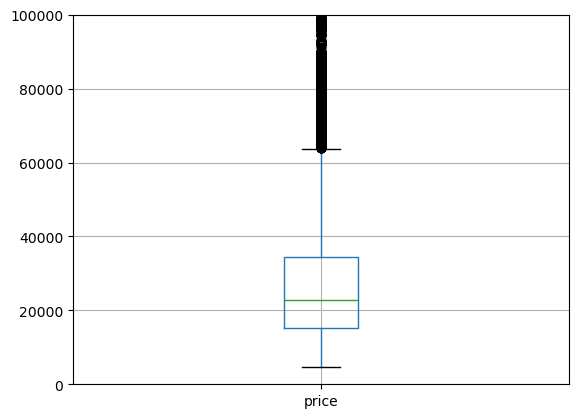

In [202]:
# Построение диаграммы "ящик с усами"

data_nan.boxplot('price') 
plt.ylim(0, 100000)

In [203]:
# рассчёт верхней границы цены 

q1 = data_nan['price'].quantile(0.25)
q3 = data_nan['price'].quantile(0.75)

iqr = q3 - q1  

print('Верхняя граница цены на автомобиль, выше которой значение может признаваться выбросом:',
      round((q3 + 1.5 * iqr)), 'долларов США')

Верхняя граница цены на автомобиль, выше которой значение может признаваться выбросом: 63708 долларов США


In [204]:
# Формирование таблицы с автомобилями, стоимостью ниже 68996 USD

data_low_price = data_nan.loc[data_nan.loc[:, 'price'] <= 68996]
data_low_price.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
0,03.2019,Mercur Auto,Audi,A3,2017,GE,Алматы,1.0,31250,31250,Легковые автомобили,C класс,Бензин,1.4,AK,FWD
1,05.2019,Mercur Auto,Audi,A3,2018,GE,Алматы,1.0,30581,30581,Легковые автомобили,C класс,Бензин,1.4,AK,FWD


In [205]:
# Для расчёта показателей цены очищаю значения цен от некорректно записанных значений 
# (умноженных на количество автомобилей)

data_low_price_1 = data_low_price.loc[data.loc[:, 'quantity'] == 1]

In [206]:
# Расчёт показателей цены

data_low_price_1['price'].describe()

count    28284.000000
mean     25810.816999
std      13500.459074
min       4571.000000
25%      15531.000000
50%      21912.000000
75%      32490.000000
max      68762.000000
Name: price, dtype: float64

<AxesSubplot:>

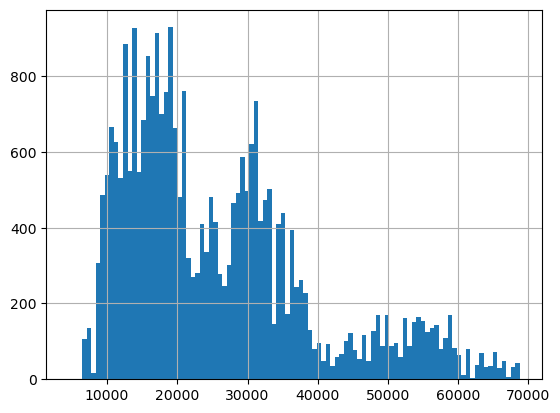

In [207]:
# Гистограмма для значений цены автомобиля до 68996 USD

data_low_price_1['price'].hist(bins=100)

In [208]:
# Формирование сгруппированной таблицы для вывода 10-ти самых продаваемых моделей автомобилей
# стоимостью ниже 68996 USD

data_low_price_group = data.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     segment=('segment', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_low_price_group = data_low_price_group.drop(columns=['index'])

data_low_price_group.head(10)

,brand,model,made_in,release,cars_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
0,Toyota,Camry,RU,2018,2538.0,Бензин,3.5,AK,FWD,Легковые автомобили,E класс
1,Lada,Granta,KZ,2018,2418.0,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
2,Lada,4x4,KZ,2018,1992.0,Бензин,1.7,MK,4WD,Внедорожники,Субкомпактные SUV
3,Hyundai,Tucson,KZ,2018,1805.0,Бензин,2.0,AK,4WD,Внедорожники,Компактные SUV
4,Lada,Vesta,KZ,2018,1677.0,Бензин,1.8,AK,FWD,Легковые автомобили,B класс
5,Lada,Largus,KZ,2018,1349.0,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
6,Hyundai,Accent,KZ,2018,1223.0,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
7,Hyundai,Creta,KZ,2018,1112.0,Бензин,1.6,AK,FWD,Внедорожники,Субкомпактные SUV
8,Toyota,LC Prado,JP,2018,1086.0,Бензин,2.7,AK,4WD,Внедорожники,Стандартные SUV
9,Hyundai,Elantra,KZ,2018,1084.0,Бензин,1.6,AK,FWD,Легковые автомобили,C класс


In [209]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_low_prices = data.loc[((data['model'] == 'Camry') | (data['model'] == 'Granta') |
                  (data['model'] == '4x4') | (data['model'] == 'Tucson') |
                  (data['model'] == 'Vesta') | (data['model'] == 'Largus') |      
                  (data['model'] == 'Accent') | (data['model'] == 'Creta') |        
                  (data['model'] == 'LC Prado') | (data['model'] == 'Elantra'))&
                            (data['quantity'] == 1)]

data_low_prices.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
3277,01.2019,Astana Motors,Hyundai,Accent,2018,KZ,Алматы,1.0,18310,18310,Легковые автомобили,B класс,Бензин,1.6,AK,FWD
3278,01.2019,Astana Motors,Hyundai,Accent,2018,KZ,Астана,1.0,18310,18310,Легковые автомобили,B класс,Бензин,1.6,AK,FWD


In [210]:
#  Формирование таблицы с выводом ценовых характеристик моделей

data_low_prices = data_low_prices.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_low_prices['price_mean'] = data_low_prices['price_mean'].round().astype(int)
data_low_prices['price_median'] = data_low_prices['price_median'].round().astype(int)

data_low_prices = data_low_prices.drop(columns=['index'])

data_low_prices.head(25)

,brand,model,made_in,release,price_mean,price_median,price_max,price_min
0,Lada,Granta,KZ,2018,7100,7100,7100,7100
1,Lada,Granta,KZ,2017,7100,7100,7100,7100
2,Lada,4x4,KZ,2017,9000,9000,9000,9000
3,Lada,4x4,KZ,2018,9000,9000,9000,9000
4,Lada,Largus,KZ,2018,11300,11300,11300,11300
5,Lada,Largus,KZ,2017,11300,11300,11300,11300
6,Lada,Vesta,KZ,2018,12491,11600,13800,10615
7,Lada,Vesta,KZ,2017,11600,11600,11600,11600
8,Lada,Largus,RU,2018,12000,12000,12000,12000
9,Lada,Largus,RU,2017,12000,12000,12000,12000


In [211]:
# выделение строк таблицы с автомобилями, стоимостью выше 68996 USD

data_high_price = data.loc[data.loc[:, 'price'] >= 68996]

data_high_price.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
53,07.2019,Mercur Auto,Audi,A7,2017,GE,Алматы,1.0,70365,70365,Легковые автомобили,E класс,Бензин,3.0,AK,4WD
54,05.2019,Mercur Auto,Audi,A8,2018,GE,Алматы,1.0,130887,130887,Легковые автомобили,F класс,Бензин,3.0,AK,4WD


(65000.0, 120000.0)

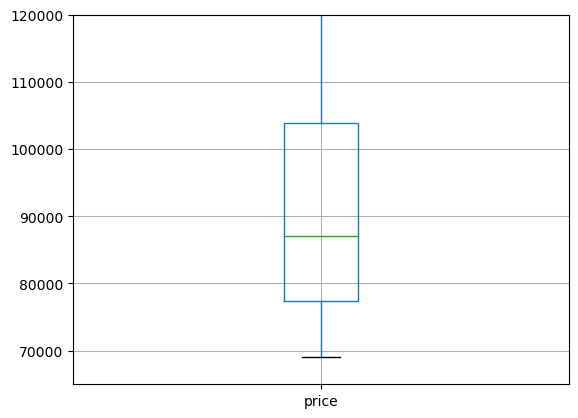

In [212]:
# Построение диаграммы "ящик с усами"

data_high_price.boxplot('price') 
plt.ylim(65000, 120000)

In [213]:
# рассчёт верхней границы цены 

q1 = data_high_price['price'].quantile(0.25)
q3 = data_high_price['price'].quantile(0.75)

iqr = q3 - q1  

print('Верхняя граница цены на автомобиль, выше которой значение может признаваться выбросом:',
      round((q3 + 1.5 * iqr)), 'долларов США')

Верхняя граница цены на автомобиль, выше которой значение может признаваться выбросом: 143711 долларов США


In [214]:
# Формирование таблицы с автомобилями, стоимостью от 68996 USD до 171389 USD

data_high_price = data.loc[(data['price'] >= 68996) & (data['price'] <= 171389)]

data_high_price.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
53,07.2019,Mercur Auto,Audi,A7,2017,GE,Алматы,1.0,70365,70365,Легковые автомобили,E класс,Бензин,3.0,AK,4WD
54,05.2019,Mercur Auto,Audi,A8,2018,GE,Алматы,1.0,130887,130887,Легковые автомобили,F класс,Бензин,3.0,AK,4WD


In [215]:
# Для расчёта показателей цены очищаю значения цен от некорректно записанных значений 
# (умноженных на количество автомобилей)

data_high_price_1 = data_high_price.loc[data.loc[:, 'quantity'] == 1]

In [216]:
# Расчёт показателей цены

data_high_price_1['price'].describe()

count      2091.000000
mean      92364.244859
std       18567.478297
min       69107.000000
25%       77336.000000
50%       86484.000000
75%      102932.000000
max      169511.000000
Name: price, dtype: float64

<AxesSubplot:>

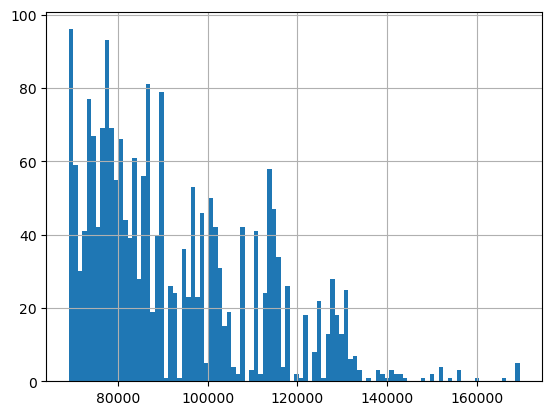

In [217]:
# Гистограмма для значений цены автомобиля от 68996 до 171389

data_high_price_1['price'].hist(bins=100)

In [218]:
# Формирование сгруппированной таблицы для вывода 10-ти самых продаваемых моделей автомобилей
# стоимостью от 68996 USD до 171389 USD

data_high_price_group = data_high_price_1.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     segment=('segment', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_high_price_group = data_high_price_group.drop(columns=['index'])

data_high_price_group.head(14)

,brand,model,made_in,release,cars_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
0,Toyota,LC200,JP,2018,570.0,Бензин,4.6,AK,4WD,Внедорожники,Полноразмерные SUV
1,Lexus,LX,JP,2018,315.0,Бензин,5.7,AK,4WD,Внедорожники,Полноразмерные SUV
2,Toyota,LC200,JP,2017,230.0,Бензин,4.6,AK,4WD,Внедорожники,Полноразмерные SUV
3,Toyota,LC Prado,JP,2018,99.0,Бензин,4.0,AK,4WD,Внедорожники,Стандартные SUV
4,Lexus,LX,JP,2017,89.0,Бензин,5.7,AK,4WD,Внедорожники,Полноразмерные SUV
5,ANKAI,HFF6850HGQ4,KZ,2018,70.0,Газовый,4.9,MK,RWD,Коммерческие автомобили,Большие автобусы
6,Toyota,LC Prado,JP,2017,67.0,Бензин,4.0,AK,4WD,Внедорожники,Стандартные SUV
7,Lexus,RX,JP,2018,62.0,Бензин,3.5,AK,4WD,Внедорожники,Компактные SUV
8,Land Rover,Range Rover,UK,2018,51.0,Бензин,3.0,AK,4WD,Внедорожники,Полноразмерные SUV
9,Iveco,Stralis,KZ,2018,34.0,Дизель,10.3,MK,RWD,Коммерческие автомобили,Крупнотоннажные грузовики


In [219]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_high_prices = data.loc[((data['model'] == 'LC200') | (data['model'] == 'LX') |
                  (data['model'] == 'LC200') | (data['model'] == 'LC Prado') |
                  (data['model'] == 'HFF6850HGQ4') | (data['model'] == 'RX') |      
                  (data['model'] == 'Range Rover') | (data['model'] == 'Stralis') |        
                  (data['model'] == 'Range Rover Sport') | (data['model'] == 'Camry')) &
                            (data['quantity'] == 1) &
                       ((data['price'] >= 68996) & (data['price'] <= 171389))]

data_high_prices.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
9376,08.2019,Allur Auto,Iveco,Stralis,2018,KZ,Алматы,1.0,90029,90029,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,10.3,MK,RWD
9377,08.2019,Allur Auto,Iveco,Stralis,2018,KZ,Алматы,1.0,90029,90029,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,10.3,MK,RWD


In [220]:
#  Формирование таблицы с выводом ценовых характеристик моделей

data_high_prices = data_high_prices.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     Мин_цена_USD=('price', 'min')).sort_values(by='price_median').reset_index()

data_high_prices['price_mean'] = data_high_prices['price_mean'].round().astype(int)
data_high_prices['price_median'] = data_high_prices['price_median'].round().astype(int)

data_high_prices = data_high_prices.drop(columns=['index'])

data_high_prices.head(15)

,brand,model,made_in,release,price_mean,price_median,price_max,Мин_цена_USD
0,Lexus,RX,JP,2018,72975,72214,78804,69432
1,Toyota,LC Prado,JP,2018,74536,75091,80606,69135
2,Toyota,Camry,RU,2018,76018,75327,77942,73522
3,Lexus,RX,JP,2017,76861,77092,79795,71682
4,ANKAI,HFF6850HGQ4,KZ,2018,77336,77336,77336,77336
5,Toyota,LC Prado,JP,2017,77745,79605,80606,69731
6,Land Rover,Range Rover Sport,UK,2016,85006,85006,85006,85006
7,Toyota,LC200,JP,2018,85327,86484,101654,69435
8,Land Rover,Range Rover Sport,UK,2018,87041,87066,89629,82989
9,Toyota,LC200,JP,2017,91784,88089,102932,71315


In [221]:
# Формирование таблицы с автомобилями, стоимостью выше 171389 USD

data_highest_price = data.loc[data.loc[:, 'price'] > 171389]

In [222]:
# Для расчёта показателей цены очищаю значения цен от некорректно записанных значений 
# (умноженных на количество автомобилей)

data_highest_price_1 = data_highest_price.loc[data.loc[:, 'quantity'] == 1]

In [223]:
# Формирование сгруппированной таблицы для вывода самых продаваемых моделей автомобилей
# стоимостью выше 171389 USD

data_highest_price_group = data_highest_price_1.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     segment=('segment', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_highest_price_group = data_highest_price_group.drop(columns=['index'])

data_highest_price_group

,brand,model,made_in,release,cars_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
0,Porsche,Panamera,GE,2017,4.0,Бензин,4.0,AK,4WD,Легковые автомобили,F класс
1,Hyundai Truck & Bus,Universe,KZ,2017,3.0,Дизель,12.3,MK,RWD,Коммерческие автомобили,Большие автобусы
2,Hyundai Truck & Bus,Universe,KR,2017,1.0,Дизель,12.3,MK,RWD,Коммерческие автомобили,Большие автобусы
3,Mercedes-Benz Trucks,Tourismo,TR,2018,1.0,Дизель,12.0,AK,RWD,Коммерческие автомобили,Крупнотоннажные грузовики
4,Porsche,911 Carrera S,GE,2017,1.0,Бензин,3.0,AK,4WD,Легковые автомобили,Спортивные автомобили
5,Porsche,911 Carrera S,GE,2018,1.0,Бензин,4.0,AK,4WD,Легковые автомобили,Спортивные автомобили
6,Porsche,Cayenne,GE,2018,1.0,Бензин,4.0,AK,4WD,Внедорожники,Стандартные SUV
7,Porsche,Panamera,GE,2018,1.0,Бензин,4.0,AK,4WD,Легковые автомобили,F класс
8,Rolls Royce,Ghost,UK,2017,1.0,Бензин,6.6,AK,RWD,Легковые автомобили,F класс
9,Урал,4320,KZ,2018,1.0,Дизель,6.6,MK,4WD,Коммерческие автомобили,Малотоннажные грузовики


In [224]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_highest_prices = data.loc[((data['model'] == 'Panamera') | (data['model'] == 'Universe') |
                  (data['model'] == 'Tourismo') | (data['model'] == '911 Carrera S') |
                  (data['model'] == 'Cayenne') | (data['model'] == 'Ghost') |      
                  (data['model'] == '4320')) &
                            (data['quantity'] == 1) &
                       (data['price'] > 171389)]

data_highest_prices.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
7145,02.2019,Astana Motors,Hyundai Truck & Bus,Universe,2017,KR,Атырау,1.0,243827,243827,Коммерческие автомобили,Большие автобусы,Дизель,12.3,MK,RWD
7146,03.2019,Astana Motors,Hyundai Truck & Bus,Universe,2017,KZ,Атырау,1.0,222640,222640,Коммерческие автомобили,Большие автобусы,Дизель,12.3,MK,RWD


In [225]:
#  Формирование таблицы с выводом ценовых характеристик моделей

data_highest_prices = data_highest_prices.groupby(['brand', 'model', 'made_in', 'release'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_highest_prices['price_mean'] = data_highest_prices['price_mean'].round().astype(int)
data_highest_prices['price_median'] = data_highest_prices['price_median'].round().astype(int)

data_highest_prices = data_highest_prices.drop(columns=['index'])

data_highest_prices

,brand,model,made_in,release,price_mean,price_median,price_max,price_min
0,Porsche,Cayenne,GE,2018,179598,179598,179598,179598
1,Porsche,911 Carrera S,GE,2017,180055,180055,180055,180055
2,Porsche,Panamera,GE,2018,192754,192754,192754,192754
3,Porsche,911 Carrera S,GE,2018,205962,205962,205962,205962
4,Porsche,Panamera,GE,2017,211235,211962,235379,185636
5,Hyundai Truck & Bus,Universe,KZ,2017,228161,222640,239204,222640
6,Hyundai Truck & Bus,Universe,KR,2017,243827,243827,243827,243827
7,Mercedes-Benz Trucks,Tourismo,TR,2018,254958,254958,254958,254958
8,Урал,4320,KZ,2018,298875,298875,298875,298875
9,Rolls Royce,Ghost,UK,2017,498788,498788,498788,498788


In [226]:
# Расчёт показателей цены

data_highest_price_1['price'].describe()

count        15.000000
mean     238949.333333
std       78602.045132
min      179598.000000
25%      199358.000000
50%      222640.000000
75%      241515.500000
max      498788.000000
Name: price, dtype: float64

<AxesSubplot:>

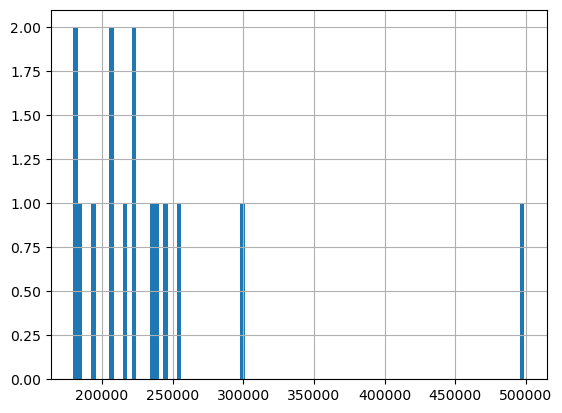

In [227]:
# Гистограмма для значений цены автомобиля свыше 171389 USD

data_highest_price_1['price'].hist(bins=100)

In [228]:
# Вывод строк с автомобилями стоимостью менее 10 000 USD

data_price_10 = data.loc[data.loc[:,'price'] <= 10000]

data_price_10.head()

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
1016,04.2019,Caspian Motors,Ford,Fiesta,2017,RU,Алматы,1.0,9851,9851,Легковые автомобили,B класс,Бензин,1.6,AK,FWD
1017,04.2019,Caspian Motors,Ford,Fiesta,2017,RU,Алматы,1.0,9851,9851,Легковые автомобили,B класс,Бензин,1.6,AK,FWD
1028,05.2019,Caspian Motors,Ford,Fiesta,2017,RU,Костанай,1.0,9567,9567,Легковые автомобили,B класс,Бензин,1.6,AK,FWD
1029,05.2019,Caspian Motors,Ford,Fiesta,2017,RU,Костанай,1.0,9567,9567,Легковые автомобили,B класс,Бензин,1.6,AK,FWD
11937,01.2019,БИПЭК АВТО,Lada,4x4,2018,KZ,Экибастуз,3.0,9000,27000,Внедорожники,Субкомпактные SUV,Бензин,1.7,MK,4WD


In [229]:
# Вывод популярности брендов и моделей автомобилей, стоимостью менее 10 000 USD

data_price_10.groupby(['brand', 'model'], as_index = False)['quantity']\
        .sum().sort_values(by= 'quantity', ascending = False).head(10)

,brand,model,quantity
5,Lada,Granta,2771.0
4,Lada,4x4,2329.0
10,Ravon,Nexia R3,829.0
6,Lada,Kalina,377.0
11,Ravon,R2,150.0
12,Ravon,R4,20.0
3,Jac,X200,12.0
1,Jac,N56,6.0
7,Lifan,Solano,6.0
14,UAZ,3303,6.0


In [230]:
# Вывод строк с автомобилями стоимостью менее 5 000 USD

data_price_5 = data.loc[data.loc[:,'price'] <= 5000]

data_price_5

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
32332,05.2019,Allur Auto,Jac,X200,2016,KZ,Алматы,1.0,4571,4571,Коммерческие автомобили,Малотоннажные грузовики,Дизель,2.8,MK,RWD


In [231]:
# Вывод общей суммы продаж автомобилей

data['sale'].sum().round()

1159600438

## Выводы по результатам анализа цен на автомобили 


Все значения цен из исходной таблицы выше 68996 USD в математическом смысле являются выбросами, однако, фактически их нельзя считать таковыми, т.к. в таблице присутствуют данные о продажах автомобилей совершенно разных классов и типов: бюджетные малые городские автомобили, спортивные автомобили, лимузины, крупнотоннажные грузовики, большие городские автобусы и др. При анализе цен на автомобили я разбил все проданные автомобили на три ценовые категории: 1. Автомобили, стоимостью до 68996 USD; 2. Автомобили, стоимостью от 68996 USD до 171389 USD; 3. Автомобили, стоимостью свыше 171389 USD. 


1. Автомобили, стоимостью до 68996 USD. Топ-10 этих моделей выглядит так:

* Toyota	Camry
* Lada	Granta
* Lada	4x4
* Hyundai	Tucson
* Lada	Vesta
* Lada	Largus
* Hyundai	Accent
* Hyundai	Creta
* Toyota	LC Prado
* Hyundai	Elantra


Медианная цена автомобилей этого ценового диапазона составляет 21912 долларов США. Из 10-ти моделей 4 - внедорожники, остальные легковые автомобили малого и среднего классов. Кроме автомобилей Toyota, все автомобили произведены в Казахстане в 2018 году, имеют передний или полный привод, чаще всего автоматическую коробку передач, бензиновый двигатель, объёмом от 1.6 литра (самый популярный вариант) до 3.5 литра. Верхнюю строчку по объёму продаж занимает Toyota Camry, произведённые в России в 2017-2018 годах, по цене около 30-34 000 долларов США. Вторую строчку занимает бюджетный автомобиль Lada Granta: производства Казахстана, стоимостью 7100 долларов США, продано 2418 штук. В топ-10 попала Toyota LC Prado, проиводства Японии, с медианой ценой 52 600 долларов США, продано 1086 штук. 


2. Автомобили, стоимостью от 68996 USD до 171389 USD. Топ-10 этих моделей выглядит так:


* Toyota	LC200
* Lexus	LX
* Toyota	LC Prado
* ANKAI	HFF6850HGQ4
* Lexus	RX
* Land Rover	Range Rover
* Iveco	Stralis
* Land Rover	Range Rover Sport
* Toyota	Camry
* Porsche	Cayenne


Медианная цена автомобилей этого ценового диапазона составляет 86484 долларов США. Из 10-ти моделей 7 - внедорожники, остальные: большой автобус, крупнотоннажный грузовик, автомобиль среднего класса. В этом ценовом диапазоне также присутствуют автомобили Toyota	Camry и Toyota LC Prado. При этом, часть этих моделей производства Японии, а не России, как в более бюджетном варианте, и, видимо, другой комплектации. Все внедорожники оснащены бензиновыми двигателями большого объёма (3.0 - 5.7 литра), полноприводные, с автоматической коробкой передач. Эти автомобили производства Японии, Великобритании, Германии, России. Попавший в топ-1 автобус - ANKAI производства Казахстана с газовым двигателем.


3. Автомобили, стоимостью свыше 171389 USD. Самые дорогие автомобили, представленные в таблице:


* Представительские, элитные автомобили. Самый дорогой - Rolls Royce Ghost - продан один такой автомобиль.


* Спортивные кроссоверы и спортивные автомобили: Porsche 911 Carrera S, Porsche	Cayenne, Porsche Panamera.


* Большие туристические автобусы: Hyundai Universe. 


* Крупнотоннажные грузовики Hyundai Truck Universe, Mercedes-Benz Tourismo.


* Полноприводный грузовик Урал 4320. Учитывая то, что этот грузовик может использоваться в военных целях, а значит может комплектоваться особым образом индивидуально под заказчика, можно предположить, что цена почти 300 000 USD объясняется комплектностью конкретно этого автомобиля.


4. Наиболее популярной маркой автомобиля, стоимостью менее 10 000 USD являются автомобили Ravon (производства Узбекистана).


5. Автомобиль, проданный по минимальной цене в таблице - Jac X200, производства Казахстана, 2016 года выпуска, цена - 4571 USD. 


6. Общая сумма продаж автомобилей за исследуемый период составляет 1 млрд. 159 млн. 600 тыс. 568 долларов США.

## Анализ локального производства

In [232]:
# Просмотр строк с продажами автомобилей Урал

data.loc[data.loc[:,'brand'] == 'Урал']

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
32035,01.2019,СемАЗ,Урал,4320,nan,KZ,Астана,1.0,69230,69230,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD
32036,02.2019,СемАЗ,Урал,4320,2014,KZ,Актобе,1.0,49697,49697,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD
32037,03.2019,СемАЗ,Урал,4320,2017,KZ,Семей,1.0,40930,40930,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD
32038,05.2019,СемАЗ,Урал,4320,2016,KZ,Астана,1.0,38095,38095,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD
32039,06.2019,СемАЗ,Урал,4320,2018,KZ,Алматы,14.0,46185,646596,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD
32040,06.2019,СемАЗ,Урал,4320,2018,KZ,Алматы,6.0,49810,298857,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD
32041,06.2019,СемАЗ,Урал,4320,2018,KZ,Алматы,1.0,298875,298875,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD
32042,06.2019,СемАЗ,Урал,4320,2018,KZ,Астана,3.0,38681,116044,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD
32043,06.2019,СемАЗ,Урал,4320,2018,KZ,Астана,1.0,38681,38681,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD
32044,07.2019,СемАЗ,Урал,4320,2018,KZ,Алматы,1.0,95184,95184,Коммерческие автомобили,Малотоннажные грузовики,Дизель,6.6,MK,4WD


In [233]:
#  Вывод списка брендов автомобилей, реализуемых компанией СемАЗ

data.loc[data.loc[:,'company'] == 'СемАЗ']['brand'].unique()

array(['Foton', 'Shacman', 'Урал'], dtype=object)

In [234]:
#  Просмотр строк с продажами автомобилей компанией СемАЗ

data.loc[data.loc[:,'company'] == 'СемАЗ']

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
1154,03.2019,СемАЗ,Foton,BJ1032V3JB3-S,2015,KZ,Семей,10.0,62392,623915,Коммерческие автомобили,Малотоннажные грузовики,Дизель,2.2,MK,RWD
1155,02.2019,СемАЗ,Foton,BJ3143DKPGA-1,2015,KZ,Семей,4.0,92954,371815,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,6.0,MK,RWD
1156,03.2019,СемАЗ,Foton,BJ3143DKPGA-1,2015,KZ,Семей,1.0,22208,22208,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,6.0,MK,RWD
1157,01.2019,СемАЗ,Foton,BJ3253DMPKB-AD,nan,KZ,Алматы,18.0,55297,995350,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,9.8,AK,RWD
1158,04.2019,СемАЗ,Foton,BJ3253DMPKB-AD,2017,KZ,Кокшетау,5.0,55692,278462,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,9.8,AK,RWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32578,08.2019,СемАЗ,Shacman,SX3258DR384,2018,KZ,Астана,4.0,56368,225473,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,9.8,MK,RWD
32579,09.2019,СемАЗ,Shacman,SX3258DR384,2018,KZ,Усть-Каменогорск,1.0,54677,54677,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,9.8,MK,RWD
32580,09.2019,СемАЗ,Shacman,SX3258DR384,2018,KZ,Семей,2.0,53166,106333,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,9.8,MK,RWD
32581,09.2019,СемАЗ,Shacman,SX3258DR384,2018,KZ,Астана,3.0,53707,161120,Коммерческие автомобили,Крупнотоннажные грузовики,Дизель,9.8,MK,RWD


Как видно из выводов предыдущих ячеек, продажами грузовиков Урал в Казахстане в исследуемый период времени занимается только одна компания - СемАЗ. Страна-производитель этих автомобилей указана как Казахстан, при том, что это российский бренд. 


Вот что пишет ТОО "СемАЗ" о себе на своём официальном сайте:


« ТОО "СемАЗ" является производителем сельскохозяйственной и коммерческой техники в Казахстане. Автосборочный завод находится в городе Семей. Завод входит входит в состав ГК «Вираж».  На заводе ТОО "СемАЗ" осуществляется сборка грузовых самосвалов «SHACMAN». Основными покупателями являются транспортные и строительные организации Казахстана. Также в 2013-2014 годах завод освоил сборку грузовых автомобилей повышенной проходимости «Урал». Покупателями являются воинские части Пограничной службы и Республиканской гвардии РК, а также нефтедобывающие и горнодобывающие компании Казахстана ».        


Вначале исследования, при выводе списка наиболее часто встречаемых наименований компаний, компания Вираж на 4-ой строке.


Автомобиль Урал 4320, видимо, поставляется в различных комплектациях, о чём свидетельствует разброс цен на эти автомобили. Также, видно, что цена на эти грузовики достаточно высока. 

In [235]:
# Формирование таблицы с автомобилями, произведёнными в Казахстане

data_kz = data.loc[data.loc[:,'made_in'] == 'KZ']

# Вывод брендов автомобилей, произведённых в Казахстане

data_kz['brand'].unique()

array(['Chevrolet', 'Daewoo', 'Foton', 'GAZ', 'Hyundai',
       'Hyundai Truck & Bus', 'Iveco', 'Jac', 'KAMAZ', 'Kia', 'Lada',
       'Peugeot', 'Ravon', 'Shacman', 'Skoda', 'SsangYong', 'UAZ', 'Урал',
       'МАЗ', 'MAN', 'ANKAI'], dtype=object)

Для оценки только новых автомобилей, сформирую таблицу с 2018 годом выпуска

In [236]:
# Формирование таблицы с автомобилями, произведёнными в Казахстане в 2018 году

data_kz_2018 = data_kz.loc[data.loc[:,'release'] == '2018']

In [237]:
# Для расчёта показателей цены очищаю значения цен от некорректно записанных значений 
# (умноженных на количество автомобилей)

data_kz_2018_1 = data_kz_2018.loc[data.loc[:, 'quantity'] == 1]

In [238]:
# Формирование сгруппированной таблицы для вывода самых продаваемых моделей автомобилей

data_kz_2018_group = data_kz_2018.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     segment=('segment', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_kz_2018_group = data_kz_2018_group.drop(columns=['index'])

data_kz_2018_group.head(10)

,brand,model,cars_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
0,Lada,Granta,2418.0,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
1,Lada,4x4,1992.0,Бензин,1.7,MK,4WD,Внедорожники,Субкомпактные SUV
2,Hyundai,Tucson,1805.0,Бензин,2.0,AK,4WD,Внедорожники,Компактные SUV
3,Lada,Vesta,1677.0,Бензин,1.8,AK,FWD,Легковые автомобили,B класс
4,Lada,Largus,1349.0,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
5,Hyundai,Accent,1223.0,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
6,Hyundai,Creta,1112.0,Бензин,1.6,AK,FWD,Внедорожники,Субкомпактные SUV
7,Hyundai,Elantra,1084.0,Бензин,1.6,AK,FWD,Легковые автомобили,C класс
8,Kia,Sportage,565.0,Бензин,2.0,AK,4WD,Внедорожники,Компактные SUV
9,Jac,S3,545.0,Бензин,1.5,AK,FWD,Внедорожники,Компактные SUV


In [239]:
# Расчёт показателей цены

data_kz_2018_1['price'].describe()

count      8081.000000
mean      20358.186239
std       11004.572291
min        7100.000000
25%       15097.000000
50%       18853.000000
75%       24350.000000
max      298875.000000
Name: price, dtype: float64

In [240]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_kz_2018_prices = data.loc[((data['model'] == 'Granta') | (data['model'] == '4x4') |
                  (data['model'] == 'Tucson') | (data['model'] == 'Vesta') |
                  (data['model'] == 'Largus') | (data['model'] == 'Accent') |      
                  (data['model'] == 'Creta') | (data['model'] == 'Elantra') |
                  (data['model'] == 'Sportage') | (data['model'] == 'S3')) &
                       (data['quantity'] == 1) &
                       (data['made_in'] == 'KZ') &
                       (data['release'] == '2018')]

data_kz_2018_prices.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
3277,01.2019,Astana Motors,Hyundai,Accent,2018,KZ,Алматы,1.0,18310,18310,Легковые автомобили,B класс,Бензин,1.6,AK,FWD
3278,01.2019,Astana Motors,Hyundai,Accent,2018,KZ,Астана,1.0,18310,18310,Легковые автомобили,B класс,Бензин,1.6,AK,FWD


In [241]:
#  Формирование таблицы с выводом ценовых характеристик моделей

data_kz_2018_prices = data_kz_2018_prices.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_kz_2018_prices['price_mean'] = data_kz_2018_prices['price_mean'].round().astype(int)
data_kz_2018_prices['price_median'] = data_kz_2018_prices['price_median'].round().astype(int)

data_kz_2018_prices = data_kz_2018_prices.drop(columns=['index'])

data_kz_2018_prices

,brand,model,price_mean,price_median,price_max,price_min
0,Lada,Granta,7100,7100,7100,7100
1,Lada,4x4,9000,9000,9000,9000
2,Lada,Largus,11300,11300,11300,11300
3,Lada,Vesta,12491,11600,13800,10615
4,Jac,S3,12558,12464,16086,11202
5,Hyundai,Accent,16854,16633,19925,14423
6,Hyundai,Elantra,19652,19169,24960,15786
7,Hyundai,Creta,20587,20204,25850,17695
8,Kia,Sportage,20700,20700,20700,20700
9,Hyundai,Tucson,26510,25569,35076,21785


In [242]:
# Вывод общей суммы продаж новых автомобилей, произведённых в Казахстане

data_kz_2018['sale'].sum().round()

293211602

In [243]:
# Вывод процента от суммы продаж новых автомобилей, произведённых в Казахстане от числа всех продаж

round(data_kz_2018['sale'].sum()/data['sale'].sum()*100, 2)

25.29

In [244]:
# Вывод общего количества автомобилей, произведённых в Казахстане в 2018 году

data_kz_2018['quantity'].sum()

17720.0

In [245]:
# Вывод процента от количества продаж новых автомобилей, произведённых в Казахстане от числа всех продаж

round(data_kz_2018['quantity'].sum()/data['quantity'].sum()*100, 2)

40.31

In [246]:
# Вывод данных о количестве сделок по продаже новых автомобилей

print('В таблице', len(data_kz['quantity']),
      'строк о сделках с продажами автомобилей, произведённых в Казахстане. При этом,',
      len(data_kz_2018['quantity']), ' строк, т.е.',
      round(len(data_kz_2018['quantity'])/len(data_kz['quantity'])*100),
      '% сделок - о продаже автомобилей, произведённых в 2018 году.')

В таблице 11526 строк о сделках с продажами автомобилей, произведённых в Казахстане. При этом, 9551  строк, т.е. 83 % сделок - о продаже автомобилей, произведённых в 2018 году.


Неглубокое сравнение типов автомобилей, проданных в разных регионах Казахстана. Регионы выбраны по принципу сильного отличия друг от друга.

In [247]:
# Автомобили, проданные в Астане

data_astana = data.loc[data.loc[:,'region'] == 'Астана']

In [248]:
# Автомобили, проданные в Актау

data_aktau = data.loc[data.loc[:,'region'] == 'Актау']

In [249]:
# Автомобили, проданные в Экибастузе

data_eki = data.loc[data.loc[:,'region'] == 'Экибастуз']

In [250]:
# Формирование сгруппированной таблицы для вывода самых продаваемых моделей автомобилей

data_astana_group = data_astana.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     segment=('segment', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_astana_group = data_astana_group.drop(columns=['index'])

data_astana_group.head(10)

,brand,model,cars_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
0,Toyota,Camry,939.0,Бензин,3.5,AK,FWD,Легковые автомобили,E класс
1,Hyundai,Tucson,541.0,Бензин,2.0,AK,4WD,Внедорожники,Компактные SUV
2,Toyota,RAV4,347.0,Бензин,2.5,AK,4WD,Внедорожники,Среднеразмерные SUV
3,Toyota,LC Prado,339.0,Бензин,4.0,AK,4WD,Внедорожники,Стандартные SUV
4,Toyota,Corolla,337.0,Бензин,1.6,AK,FWD,Легковые автомобили,C класс
5,Hyundai,Elantra,316.0,Бензин,2.0,AK,FWD,Легковые автомобили,C класс
6,Hyundai,Accent,297.0,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
7,Hyundai,Creta,284.0,Бензин,2.0,AK,FWD,Внедорожники,Субкомпактные SUV
8,Lada,Granta,223.0,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
9,Lada,4x4,199.0,Бензин,1.7,MK,4WD,Внедорожники,Субкомпактные SUV


In [251]:
# Формирование сгруппированной таблицы для вывода самых продаваемых моделей автомобилей

data_aktau_group = data_aktau.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     segment=('segment', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_aktau_group = data_aktau_group.drop(columns=['index'])

data_aktau_group.head(10)

,brand,model,cars_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
0,Lada,Granta,234.0,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
1,Lada,Largus,158.0,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
2,Toyota,Camry,127.0,Бензин,2.5,AK,FWD,Легковые автомобили,E класс
3,Lada,Vesta,124.0,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
4,Lada,4x4,120.0,Бензин,1.7,MK,4WD,Внедорожники,Субкомпактные SUV
5,KAMAZ,43118,85.0,Дизель,10.8,MK,4WD,Коммерческие автомобили,Крупнотоннажные грузовики
6,Toyota,LC Prado,84.0,Бензин,4.0,AK,4WD,Внедорожники,Стандартные SUV
7,GAZ,3302,82.0,Бензин,2.7,MK,RWD,Коммерческие автомобили,Малотоннажные грузовики
8,Ravon,Nexia R3,66.0,Бензин,1.5,AK,FWD,Легковые автомобили,B класс
9,Hyundai,Creta,64.0,Бензин,1.6,AK,4WD,Внедорожники,Субкомпактные SUV


In [252]:
# Формирование сгруппированной таблицы для вывода самых продаваемых моделей автомобилей

data_eki_group = data_eki.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     segment=('segment', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_eki_group = data_eki_group.drop(columns=['index'])

data_eki_group.head(10)

,brand,model,cars_qnt,fuel,capacity_engine,transmission,type_drive,segment,class_2013
0,Lada,Vesta,43.0,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
1,Lada,Granta,33.0,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
2,Lada,4x4,20.0,Бензин,1.7,MK,4WD,Внедорожники,Субкомпактные SUV
3,Lada,XRAY,11.0,Бензин,1.8,MK,FWD,Легковые автомобили,B класс
4,Lada,Largus,10.0,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
5,Kia,Sportage,9.0,Бензин,2.0,AK,4WD,Внедорожники,Компактные SUV
6,Lada,Kalina,3.0,Бензин,1.6,MK,FWD,Легковые автомобили,B класс
7,Skoda,Rapid,3.0,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
8,Kia,Rio,2.0,Бензин,1.6,AK,FWD,Легковые автомобили,B класс
9,Kia,Sorento,2.0,Бензин,2.4,AK,4WD,Внедорожники,Стандартные SUV


## Выводы по результатам анализа локального производства


В Казахстане производятся автомобили следующих брендов: 'Chevrolet', 'Daewoo', 'Foton', 'GAZ', 'Hyundai', 'Hyundai Truck & Bus', 'Iveco', 'Jac', 'KAMAZ', 'Kia', 'Lada', 'Peugeot', 'Ravon', 'Shacman', 'Skoda', 'SsangYong', 'UAZ', 'Урал', 'МАЗ', 'MAN', 'ANKAI'. 

Топ-10 самых продаваемых новых автомобилей, произведённых в Казахстане выглядит так:


* Lada	Granta
* Lada	4x4
* Hyundai	Tucson
* Lada	Vesta
* Lada	Largus
* Hyundai	Accent
* Hyundai	Creta
* Hyundai	Elantra
* Kia	Sportage
* Jac	S3


Половина из этих моделей - внедорожники, другая половина  - легковые автомобили. Все автомобили с бензиновыми двигателя ёмкостью от 1.5 до 2.0 литра, самый популярный объём двигателя - 1.6 литра. Автомобили либо переднеприводные, либо полноприводные. Все модели кроме одной оснащены автоматической коробкой передач. 


Минимальая стоимость у автомобиля Lada	Granta - 7100 долларов США. Максимальная цена для автомобиля из топ-10 - 35 076 долларов США у автомобиля Hyundai Tucson. Медианная цена нового автомобиля, произведённого в Казахстане составляет 18 853 доллара США.


Объём продаж новых автомобилей, произведённых в Казахстане составляет 293 млн. 211 тыс. 489 долларов США, или 25.29% от суммы продаж всех автомобилей.


Объём продаж новых автомобилей, произведённых в Казахстане в штуках составляет 17 720 штук, или 40.31% от объёма продаж всех автомобилей.


Среди самых дорогих автомобилей, производящихся в Казахстане, грузовики Урал, поставляемые в воинские части Пограничной службы и Республиканской гвардии РК, а также в нефтедобывающие и горнодобывающие компании Казахстана.


Поверхностный взгляд по сравнению типов (моделей) проданных автомобилей в разных регионах Казахстана показывает ожидаемое различие. В Астане первые строчки проданных автомобилей составляют внедорожники и легковые автомобили не низшего класса, почти все автомобили с автоматической коробкой передач. Верхние строчки проданных в Экибастузе автомобилей - это в основном автомобили класса "В" преимущественно с механической коробкой передач. Верхние строчки проданных в Актау автомобилей - это в основном автомобили класса "В" преимущественно с механической коробкой передач, плюс ГАЗель и КАМАЗ.

## Самые популярные автомобили по основным сегментам

#### Легковые автомобили

In [253]:
# Формирование среза 'Легковые автомобили'

data_pass_car = data.loc[data.loc[:,'segment'] == 'Легковые автомобили ']

In [254]:
# Формирование сгруппированной таблицы для вывода самых продаваемых моделей автомобилей

data_pass_car_group = data_pass_car.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_pass_car_group = data_pass_car_group.drop(columns=['index'])

data_pass_car_group.head(10)

,brand,model,cars_qnt,fuel,capacity_engine,transmission,type_drive,class_2013
0,Toyota,Camry,3440.0,Бензин,3.5,AK,FWD,E класс
1,Lada,Granta,2771.0,Бензин,1.6,AK,FWD,B класс
2,Lada,Vesta,1843.0,Бензин,1.8,AK,FWD,B класс
3,Lada,Largus,1616.0,Бензин,1.6,MK,FWD,B класс
4,Hyundai,Accent,1332.0,Бензин,1.6,AK,FWD,B класс
5,Hyundai,Elantra,1152.0,Бензин,2.0,AK,FWD,C класс
6,Toyota,Corolla,1103.0,Бензин,1.6,AK,FWD,C класс
7,Ravon,Nexia R3,1041.0,Бензин,1.5,MK,FWD,B класс
8,Lada,XRAY,682.0,Бензин,1.8,AK,FWD,B класс
9,Volkswagen,Polo,673.0,Бензин,1.6,AK,FWD,B класс


In [255]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_pass_car_prices = data.loc[((data['model'] == 'Camry') | (data['model'] == 'Granta') |
                  (data['model'] == 'Vesta') | (data['model'] == 'Largus') |
                  (data['model'] == 'Accent') | (data['model'] == 'Elantra') |      
                  (data['model'] == 'Corolla') | (data['model'] == 'Nexia R3') |
                  (data['model'] == 'XRAY') | (data['model'] == 'Polo')) &
                       (data['quantity'] == 1)]

data_pass_car_prices.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
3277,01.2019,Astana Motors,Hyundai,Accent,2018,KZ,Алматы,1.0,18310,18310,Легковые автомобили,B класс,Бензин,1.6,AK,FWD
3278,01.2019,Astana Motors,Hyundai,Accent,2018,KZ,Астана,1.0,18310,18310,Легковые автомобили,B класс,Бензин,1.6,AK,FWD


In [256]:
#  Формирование таблицы с выводом ценовых характеристик моделей

data_pass_car_prices = data_pass_car_prices.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_pass_car_prices['price_mean'] = data_pass_car_prices['price_mean'].round().astype(int)
data_pass_car_prices['price_median'] = data_pass_car_prices['price_median'].round().astype(int)

data_pass_car_prices = data_pass_car_prices.drop(columns=['index'])

data_pass_car_prices

,brand,model,price_mean,price_median,price_max,price_min
0,Lada,Granta,7100,7100,7100,7100
1,Ravon,Nexia R3,9597,9626,14066,8131
2,Lada,Largus,11551,11300,12000,11300
3,Lada,Vesta,12329,11600,13800,10615
4,Lada,XRAY,13800,13800,13800,13800
5,Volkswagen,Polo,14881,14397,20017,11996
6,Hyundai,Accent,16881,16777,19925,14423
7,Hyundai,Elantra,19716,19311,26681,15786
8,Toyota,Corolla,20581,20511,24478,15377
9,Toyota,Camry,33687,32564,77942,24137


In [257]:
# Расчёт характеристик цен автомобилей по топ-10 самых популярных моделей легковых автомобилей

data_pass_car_prices['price_median'].describe()

count       10.000000
mean     15698.600000
std       7257.721807
min       7100.000000
25%      11375.000000
50%      14098.500000
75%      18677.500000
max      32564.000000
Name: price_median, dtype: float64

#### Внедорожники

In [258]:
# Формирование среза 'Внедорожники'

data_suv_car = data.loc[data.loc[:,'segment'] == 'Внедорожники ']

In [259]:
# Формирование сгруппированной таблицы для вывода самых продаваемых моделей автомобилей

data_suv_car_group = data_suv_car.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_suv_car_group = data_suv_car_group.drop(columns=['index'])

data_suv_car_group.head(10)

,brand,model,cars_qnt,fuel,capacity_engine,transmission,type_drive,class_2013
0,Lada,4x4,2329.0,Бензин,1.7,MK,4WD,Субкомпактные SUV
1,Hyundai,Tucson,1890.0,Бензин,1.6,AK,4WD,Компактные SUV
2,Toyota,LC Prado,1489.0,Бензин,4.0,AK,4WD,Стандартные SUV
3,Toyota,RAV4,1348.0,Бензин,2.5,AK,4WD,Среднеразмерные SUV
4,Hyundai,Creta,1202.0,Бензин,2.0,AK,4WD,Субкомпактные SUV
5,Toyota,LC200,859.0,Бензин,4.6,AK,4WD,Полноразмерные SUV
6,Kia,Sportage,683.0,Бензин,2.0,AK,4WD,Компактные SUV
7,Jac,S3,631.0,Бензин,1.5,AK,FWD,Компактные SUV
8,Renault,Duster,567.0,Бензин,2.0,AK,4WD,Компактные SUV
9,Chevrolet,Niva,512.0,Бензин,1.7,MK,4WD,Субкомпактные SUV


In [260]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_suv_car_prices = data.loc[((data['model'] == '4x4') | (data['model'] == 'Tucson') |
                  (data['model'] == 'LC Prado') | (data['model'] == 'RAV4') |
                  (data['model'] == 'Creta') | (data['model'] == 'LC200') |      
                  (data['model'] == 'Sportage') | (data['model'] == 'S3') |
                  (data['model'] == 'Duster') | (data['model'] == 'Niva')) &
                       (data['quantity'] == 1)]

data_suv_car_prices.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
418,01.2019,Вираж,Chevrolet,Niva,2017,KZ,Астана,1.0,14364,14364,Внедорожники,Субкомпактные SUV,Бензин,1.7,MK,4WD
419,01.2019,Вираж,Chevrolet,Niva,2017,KZ,Кокшетау,1.0,14364,14364,Внедорожники,Субкомпактные SUV,Бензин,1.7,MK,4WD


In [261]:
#  Формирование таблицы с выводом ценовых характеристик моделей

data_suv_car_prices = data_suv_car_prices.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_suv_car_prices['price_mean'] = data_suv_car_prices['price_mean'].round().astype(int)
data_suv_car_prices['price_median'] = data_suv_car_prices['price_median'].round().astype(int)

data_suv_car_prices = data_suv_car_prices.drop(columns=['index'])

data_suv_car_prices

,brand,model,price_mean,price_median,price_max,price_min
0,Lada,4x4,9000,9000,9000,9000
1,Chevrolet,Niva,12046,12059,14364,10903
2,Jac,S3,12547,12464,16086,11194
3,Renault,Duster,13758,12902,20725,12335
4,Hyundai,Creta,20666,20294,27480,17695
5,Kia,Sportage,20700,20700,20700,20700
6,Hyundai,Tucson,26551,25569,37262,21785
7,Toyota,RAV4,31322,30963,37668,25292
8,Toyota,LC Prado,56140,54074,80606,40494
9,Toyota,LC200,85681,85564,102932,63609


In [262]:
# Расчёт характеристик цен автомобилей по топ-10 самых популярных моделей внедорожников

data_suv_car_prices['price_median'].describe()

count       10.000000
mean     28358.900000
std      24046.190336
min       9000.000000
25%      12573.500000
50%      20497.000000
75%      29614.500000
max      85564.000000
Name: price_median, dtype: float64

#### Коммерческие автомобили

In [263]:
# Формирование среза 'Коммерческие автомобили'

data_comm_car = data.loc[data.loc[:,'segment'] == 'Коммерческие автомобили ']

In [264]:
# Формирование сгруппированной таблицы для вывода самых продаваемых моделей автомобилей

data_comm_car_group = data_comm_car.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(cars_qnt=('quantity', 'sum'),
                     fuel=('fuel_new', 'first'),
                     capacity_engine=('capacity_engine_new', 'first'),
                     transmission=('transmission_new', 'first'),
                     type_drive=('type_drive_new_new', 'first'),
                     class_2013=('class_2013', 'first'))\
                    .sort_values(by='cars_qnt', ascending = False).reset_index()

data_comm_car_group = data_comm_car_group.drop(columns=['index'])

data_comm_car_group.head(10)

,brand,model,cars_qnt,fuel,capacity_engine,transmission,type_drive,class_2013
0,GAZ,3302,1099.0,Бензин,2.7,MK,RWD,Малотоннажные грузовики
1,GAZ,Next,498.0,Дизель,4.4,MK,RWD,Малотоннажные грузовики
2,UAZ,3909,410.0,Бензин,2.7,MK,4WD,Развозные автомобили
3,KAMAZ,65115,198.0,Дизель,6.7,MK,4WD,Крупнотоннажные грузовики
4,KAMAZ,43118,198.0,Дизель,10.8,MK,4WD,Крупнотоннажные грузовики
5,GAZ,2705,192.0,Бензин,2.7,MK,4WD,Развозные автомобили
6,KAMAZ,45143,127.0,Дизель,6.7,MK,RWD,Крупнотоннажные грузовики
7,UAZ,2206,106.0,Бензин,2.7,MK,4WD,Микроавтобусы
8,GAZ,3221,97.0,Бензин,2.7,MK,RWD,Микроавтобусы
9,Урал,4320,80.0,Дизель,6.6,MK,4WD,Малотоннажные грузовики


In [265]:
# Для просмотра цен на эти модели автомобилей, формирую таблицу

data_comm_car_prices = data.loc[((data['model'] == '3302') | (data['model'] == 'Next') |
                  (data['model'] == '3909') | (data['model'] == '65115') |
                  (data['model'] == '43118') | (data['model'] == '2705') |      
                  (data['model'] == '45143') | (data['model'] == '2206') |
                  (data['model'] == '3221') | (data['model'] == '4320')) &
                       (data['quantity'] == 1)]

data_comm_car_prices.head(2)

,month,company,brand,model,release,made_in,region,quantity,price,sale,segment,class_2013,fuel_new,capacity_engine_new,transmission_new,type_drive_new_new
1202,01.2019,Вираж,GAZ,2705,2017,KZ,Шымкент,1.0,26013,26013,Коммерческие автомобили,Развозные автомобили,Бензин,2.7,MK,4WD
1203,01.2019,Вираж,GAZ,2705,2017,RU,Петропавловск,1.0,26013,26013,Коммерческие автомобили,Развозные автомобили,Бензин,2.7,MK,RWD


In [266]:
#  Формирование таблицы с выводом ценовых характеристик моделей

data_comm_car_prices = data_comm_car_prices.groupby(['brand', 'model'],
                                    as_index = False)\
                .agg(price_mean=('price', 'mean'),
                     price_median=('price', 'median'),
                     price_max=('price', 'max'),
                     price_min=('price', 'min')).sort_values(by='price_median').reset_index()

data_comm_car_prices['price_mean'] = data_comm_car_prices['price_mean'].round().astype(int)
data_comm_car_prices['price_median'] = data_comm_car_prices['price_median'].round().astype(int)

data_comm_car_prices = data_comm_car_prices.drop(columns=['index'])

data_comm_car_prices

,brand,model,price_mean,price_median,price_max,price_min
0,UAZ,3909,13993,14520,15250,11200
1,UAZ,2206,15282,15489,17438,13194
2,GAZ,3302,16406,16771,18775,13564
3,GAZ,2705,18796,18221,26013,14922
4,GAZ,3221,22414,21784,27616,19047
5,GAZ,Next,23317,22197,33900,13428
6,KAMAZ,45143,50375,45394,81292,44187
7,KAMAZ,65115,48466,48417,79476,44515
8,KAMAZ,43118,56138,56796,64706,51530
9,Урал,4320,90309,59464,298875,38095


In [267]:
# Расчёт характеристик цен автомобилей по топ-10 самых популярных моделей коммерческих автомобилей

data_comm_car_prices['price_median'].describe()

count       10.000000
mean     31905.300000
std      18313.178692
min      14520.000000
25%      17133.500000
50%      21990.500000
75%      47661.250000
max      59464.000000
Name: price_median, dtype: float64

## Выводы по результатам анализа автомобилей основных сегментов

Топ-10 самых продаваемых легковых автомобилей выглядит так:


* Toyota	Camry
* Lada	Granta
* Lada	Vesta
* Lada	Largus
* Hyundai	Accent
* Hyundai	Elantra
* Toyota	Corolla
* Ravon	Nexia R3
* Lada	XRAY
* Volkswagen	Polo


Все автомобили с бензиновым двигателем, объёмом от 1.5 до 3.5 литра, самый популярный объём двигателя - 1.6 литра, 9 из 10 моделей оснащены автоматической коробкой передач, все модели с передним приводом. Минимальная цена на автомобиль из топ-10 составляет 7100 долларов США, медианная цена на автомобиль из топ-10 составляет почти  14 100 долларов США.


Топ-10 самых продаваемых внедорожников выглядит так:


* Lada	    4x4
* Hyundai	Tucson
* Toyota	LC Prado
* Toyota	RAV4
* Hyundai	Creta
* Toyota	LC200
* Kia	    Sportage
* Jac	    S3
* Renault	Duster
* Chevrolet	Niva


Все автомобили с бензиновым двигателем, объёмом от 1.6 до 4.6 литра, самый популярный объём двигателя - 2 литра, 8 из 10 моделей оснащены автоматической коробкой передач, 9 из 10 моделей с полным приводом. Минимальная цена на автомобиль из топ-10 составляет 9000 долларов США, медианная цена на автомобиль из топ-10 составляет почти 20 500 долларов США.


Топ-10 самых продаваемых коммерческих автомобилей выглядит так:


* GAZ	3302
* GAZ	Next
* UAZ	3909
* KAMAZ	65115
* KAMAZ	43118
* GAZ	2705
* KAMAZ	45143
* UAZ	2206
* GAZ	3221
* Урал	4320


У половины этих автомобилей бензиновые двигатели, и другой половины дизельные двигатели. Все модели оснащены механической коробкой передач, 6 из 10 моделей с полным приводом, остальные с задним приводом. Самый популярный класс коммерческих автомобилей - это малотоннажные грузовики, также в топ-10 крупнотоннажные грузовики, развозные автомобили и микроавтобусы. Минимальная цена на автомобиль из топ-10 составляет 14 520 долларов США, медианная цена на автомобиль из топ-10 составляет почти 22 000 долларов США.

# Общий вывод



* В таблице представлены данные о продаже автомобилей в Казахстане с января по сентябрь 2019 года. 


* Лидером по количеству совершённых сделок является компания Toyota Motor Kazakhstan. 


* В таблице представлены данные о продажах автомобилей 47-ми брендов и 294-ёх моделей автомобилей, произведённых в Австрии, Белоруссии, Великобритании, Венгрии, Вьетнаме, Германии, Казахстане, Нидерландах, России, США, Таиланде, Турции, Узбекистане, Швеции, Южной Корее и Японии. Автомобили, произведённые в Казахстане, составляют более 47% от всех проданных автомобилей, а автомобили, произведённые в России и в Казахстане, более 78% от всех проданных автомобилей. 


* Автомобили 2018 года выпуска составляют более 75% от всех проданных автомобилей, а автомобили 2017 и 2018 годов выпуска более 99% от всех проданных автомобилей.


* Автомобили с бензиновыми двигателями составляют более 94% от всех проданных автомобилей. Электрические автомобили и автомобили с гибридными двигателями составляют менее 0,13% от всех проданных автомобилей.


* Выделяются три набора самых популярных объёмов двигателя: 1.5, 1.6, 1.7 и 1.8 литра; 2.0 литра; 2.5, 2.7 литра. Самый популярный объём двигателя - 1.6 литра, почти треть от всех проданных автомобилей с таким объёмом двигателя.


* Из всех проданных автомобилей около 61% автомобилей оснащены автоматической коробкой передач.


* Наиболее популярный тип привода у проданных автомобилей - передний (около 54% от всех проданных автомобилей), полноприводных автомобилей около 38%, заднеприводных менее 8% от всех проданных автомобилей.


* В таблице представлены данные о продаже 43 957 автомобилей. Некоторые модели покупаются партиями по несколько десятков одинаковых автомобилей за раз. В основном партиями от 10-ти штук поставляются автомобили следующих классов: автомобили класса В; внедорожники; малотоннажные грузовики; крупнотоннажные грузовики. Марки таких автомобилей: Lada, UAZ, Kia, Hyundai. Более двух третей покупок - это покупка одного автомобиля.


* Более 45% проданных автомобилей составляют легковые автомобили, ещё около 40% - внедорожники. Автомобили класса В - небольшие бюджетные автомобили - составляют около 27% от всех проданных автомобилей.


* Топ-10 моделей автомобилей, стоимостью менее 70 000 долларов США, выглядит так:


* Toyota Camry
* Lada Granta
* Lada 4x4
* Hyundai Tucson
* Lada Vesta
* Lada Largus
* Hyundai Accent
* Hyundai Creta
* Toyota LC Prado
* Hyundai Elantra


* Медианная цена автомобилей этого ценового диапазона составляет 21912 долларов США. Из 10-ти моделей 4 - внедорожники, остальные легковые автомобили малого и среднего классов. Кроме автомобилей Toyota, все автомобили произведены в Казахстане в 2018 году, имеют передний или полный привод, чаще всего автоматическую коробку передач, бензиновый двигатель, объёмом от 1.6 литра (самый популярный вариант) до 3.5 литра. Верхнюю строчку по объёму продаж занимает Toyota Camry, произведённые в России в 2017-2018 годах, по цене около 30-34 000 долларов США. Вторую строчку занимает бюджетный автомобиль Lada Granta: производства Казахстана, стоимостью 7100 долларов США, продано 2418 штук. В топ-10 попала Toyota LC Prado, проиводства Японии, с медианой ценой 52 600 долларов США, продано 1086 штук.


* В Казахстане существует собственное прозводство, сборка автомомбилей различных классов. Самые популярные автомобили, произведённые в Казахстане это внедорожники и легковые автомобили. Все популярные автомобили с бензиновыми двигателя ёмкостью от 1.5 до 2.0 литра, самый популярный объём двигателя - 1.6 литра, популярные автомобили либо переднеприводные, либо полноприводные. Минимальная стоимость у автомобиля Lada Granta, произведённого в Казахстане в 2018 году - 7100 долларов США. Максимальная цена для автомобиля из топ-10 - 35 076 долларов США у автомобиля Hyundai Tucson. Медианная цена нового автомобиля, произведённого в Казахстане составляет 18 853 доллара США. Объём продаж новых автомобилей, произведённых в Казахстане составляет 293 млн. 211 тыс. 489 долларов США, или 25.29% от суммы продаж всех автомобилей. Объём продаж новых автомобилей, произведённых в Казахстане в штуках составляет 17 720 штук, или 40.31% от объёма продаж всех автомобилей.


* Продажи автомобилей в Казахстане имеют региональные различия. 


* Топ-10 самых продаваемых легковых автомобилей выглядит так:


* Toyota Camry
* Lada Granta
* Lada Vesta
* Lada Largus
* Hyundai Accent
* Hyundai Elantra
* Toyota Corolla
* Ravon Nexia R3
* Lada XRAY
* Volkswagen Polo


* Топ-10 самых продаваемых внедорожников выглядит так:


* Lada 4x4
* Hyundai Tucson
* Toyota LC Prado
* Toyota RAV4
* Hyundai Creta
* Toyota LC200
* Kia Sportage
* Jac S3
* Renault Duster
* Chevrolet Niva


* Топ-10 самых продаваемых коммерческих автомобилей выглядит так:


* GAZ 3302
* GAZ Next
* UAZ 3909
* KAMAZ 65115
* KAMAZ 43118
* GAZ 2705
* KAMAZ 45143
* UAZ 2206
* GAZ 3221
* Урал 4320

